# Projet de Machine Learning

# Jeu de données

Les données proviennent du concours KAGGLE et font partie du jeu de données intitulé "Gym Members Exercise Dataset", accessible ici : [Gym Members Exercise Dataset](https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset).

Ce jeu de données offre un aperçu détaillé des habitudes d'exercice, des caractéristiques physiques et des indicateurs de condition physique des membres d’une salle de sport. Il comprend 15 variables observées chez 973 individus fréquentant une salle de sport :

- **Age** : Âge du membre.
- **Gender** : Sexe du membre (variable qualitative avec deux catégories : homme ou femme).
- **Weight_kg** : Poids en kilogrammes.
- **Height_m** : Taille en mètres.
- **Max_BPM** : Fréquence cardiaque maximale (en battements par minute) atteinte pendant les séances d’entraînement.
- **Avg_BPM** : Fréquence cardiaque moyenne durant les séances d’entraînement.
- **Resting_BPM** : Fréquence cardiaque au repos avant l’entraînement.
- **Session_Duration_hours** : Durée de chaque séance d’entraînement en heures.
- **Calories_Burned** : Nombre total de calories brûlées lors de chaque séance.
- **Workout_Type** : Type d’entraînement pratiqué (variable qualitative avec 4 catégories : cardio, musculation, yoga, HIIT).
- **Fat_Percentage** : Pourcentage de masse grasse du membre.
- **Water_Intake_liters** : Quantité d’eau consommée quotidiennement pendant les séances d’entraînement.
- **Workout_Frequency_days_week** : Nombre de séances d’entraînement hebdomadaires (variable qualitative avec 4 catégories : de 2 à 5 séances).
- **Experience_Level** : Niveau d’expérience (variable qualitative avec 3 niveaux : 1 pour débutant, 3 pour expert).
- **BMI** : Indice de masse corporelle (IMC), calculé à partir du poids et de la taille.

L'objectif de ce projet est d'abord de prédire la variable **Calories_Burned** en fonction des autres variables, puis d'estimer la variable **Experience_Level** en utilisant toutes les autres variables disponibles, y compris **Calories_Burned**.


## 1. Analyse exploratoire des données
L’objectif dans un premier temps est d’explorer les différentes variables, étape préliminaire indispensable à
l’analyse. Ci-dessous sont précisées quelques questions basiques. Vous pouvez compléter l’analyse selon vos
propres idées.
* Commencez par vérifier la nature des différentes variables et leur encodage. N’oubliez pas de convertir
toutes les variables qualitatives.
* Commencez l’exploration par une analyse descriptive unidimensionnelle des données. Des transformations
des variables quantitatives vous semblent-t-elles pertinentes ?
* Poursuivez avec une analyse descriptive bidimensionnelle. Utilisez des techniques de visualisation: par
exemple les nuages de points (scatterplot), des graphes des correlations, des boîtes à moustaches parallèles,
mosaicplot... Quelles variables semblent liées ?
* Réalisez une analyse en composantes principales des variables explicatives quantitatives et interprétez les
résultats. Visualisez les dépendances éventuelles entre les variables à prédire et les variables explicatives.

Cette analyse a été réalisé en R

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt, log
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
path=""
data=pd.read_csv(path+"gym_members_exercise_tracking.csv",sep=",",header=0)
# Vérification du contenu
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [10]:
data.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [12]:
data['Gender'] = data['Gender'].astype('category')
data['Workout_Type'] = data['Workout_Type'].astype('category')
data['Workout_Frequency (days/week)'] = data['Workout_Frequency (days/week)'].astype('category')
data['Experience_Level'] = data['Experience_Level'].astype('category')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            973 non-null    int64   
 1   Gender                         973 non-null    category
 2   Weight (kg)                    973 non-null    float64 
 3   Height (m)                     973 non-null    float64 
 4   Max_BPM                        973 non-null    int64   
 5   Avg_BPM                        973 non-null    int64   
 6   Resting_BPM                    973 non-null    int64   
 7   Session_Duration (hours)       973 non-null    float64 
 8   Calories_Burned                973 non-null    float64 
 9   Workout_Type                   973 non-null    category
 10  Fat_Percentage                 973 non-null    float64 
 11  Water_Intake (liters)          973 non-null    float64 
 12  Workout_Frequency (days/week)  973 n

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [14]:
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,49.840000


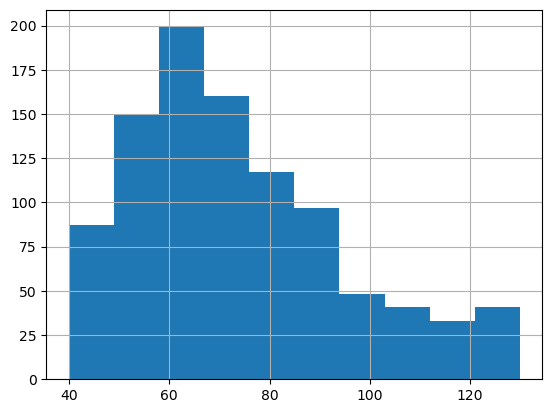

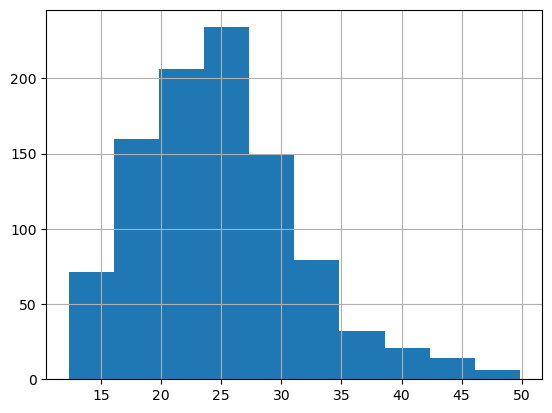

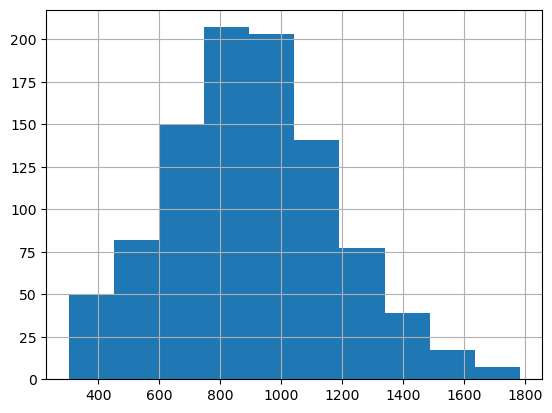

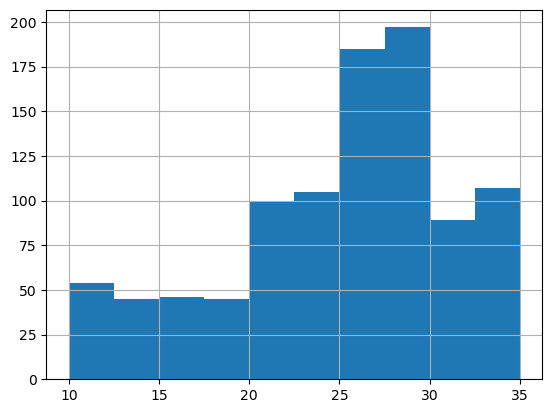

In [16]:
data["Weight (kg)"].hist()
plt.show()
data["BMI"].hist()
plt.show()
data["Calories_Burned"].hist()
plt.show()
data["Fat_Percentage"].hist()
plt.show()

In [17]:
data["Weight (kg)"]=data["Weight (kg)"].map(lambda x: log(x))
data["BMI"]=data["BMI"].map(lambda x: log(x))
data["Calories_Burned"]=data["Calories_Burned"].map(lambda x: sqrt(x))
data["Fat_Percentage"]=data["Fat_Percentage"].map(lambda x: x**2)

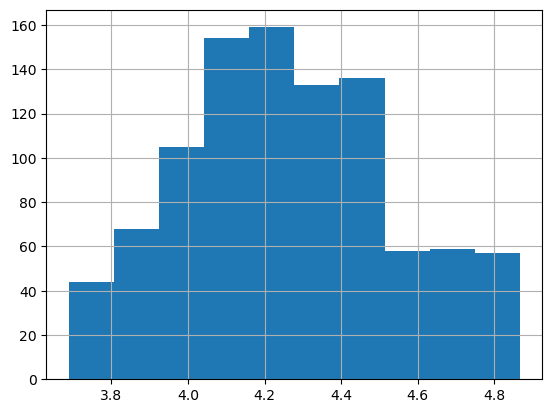

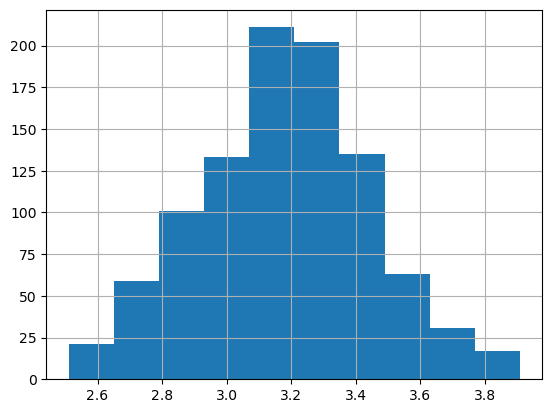

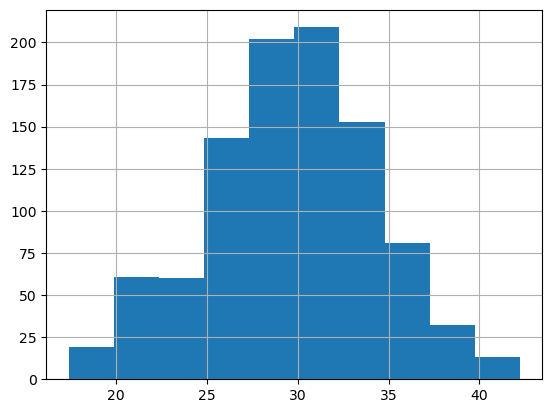

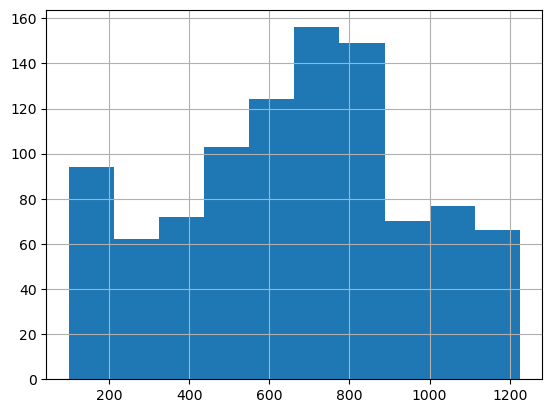

In [20]:
data["Weight (kg)"].hist()
plt.show()
data["BMI"].hist()
plt.show()
data["Calories_Burned"].hist()
plt.show()
data["Fat_Percentage"].hist()
plt.show()

In [88]:
dataDum=pd.get_dummies(data[["Gender","Workout_Type","Workout_Frequency (days/week)","Experience_Level"]])
dataQuant=data[["Age","Weight (kg)","Height (m)","Max_BPM","Avg_BPM","Resting_BPM","Session_Duration (hours)","Fat_Percentage","Water_Intake (liters)","BMI"]]
dfR=pd.concat([dataDum,dataQuant],axis=1)
dfR.head()

,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Workout_Frequency (days/week)_2,Workout_Frequency (days/week)_3,Workout_Frequency (days/week)_4,Workout_Frequency (days/week)_5,...,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),BMI
0,False,True,False,False,False,True,False,False,True,False,...,56,4.480740,1.71,180,157,60,1.69,158.76,3.5,3.407842
1,True,False,False,True,False,False,False,False,True,False,...,46,4.316154,1.53,179,151,66,1.30,1149.21,2.1,3.465736
2,True,False,True,False,False,False,False,False,True,False,...,32,4.220977,1.66,167,122,54,1.11,1115.56,2.3,3.207208
3,False,True,False,False,True,False,False,True,False,False,...,25,3.974058,1.70,190,164,56,0.59,829.44,2.1,2.912894
4,False,True,False,False,True,False,False,True,False,False,...,38,3.830813,1.79,188,158,68,0.64,852.64,2.8,2.666534


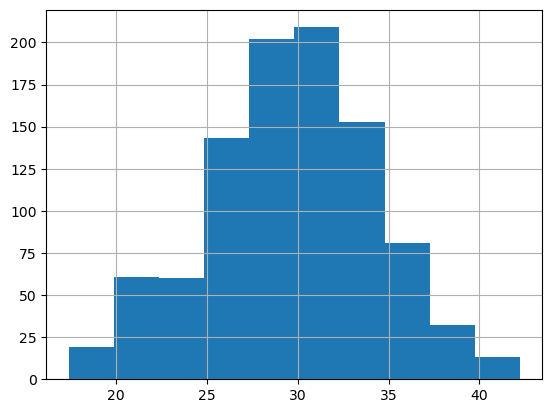

In [24]:
Yc=data["Calories_Burned"]
Yc.hist()
plt.show()

# Régression linéaire

In [90]:
from sklearn.model_selection import train_test_split, KFold
X_train,X_test,Yc_train,Yc_test=train_test_split(dfR,Yc,test_size=0.2,random_state=11)

In [92]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
Xc_train = scaler.transform(X_train)  
Xc_test = scaler.transform(X_test)

**régression avec choix de modèle par régularisation avec une pénalisation lasso**

In [95]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
regLasso = linear_model.Lasso()
regLasso.fit(Xc_train,Yc_train)
prev=regLasso.predict(Xc_test)
print("MSE=",mean_squared_error(Yc_test,prev))

MSE= 3.721532549873233


In [97]:
from sklearn.metrics import r2_score
print("R2=",r2_score(Yc_test,prev))

R2= 0.8492710764523865


**Optimisation du paramètre de pénalisation Lasso par validation croisée**

In [100]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,1]}]
#kf = KFold(n_splits = 10, shuffle = True, random_state = 11)
#On peut remplacer cv=5 par cv=kf
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xc_train, Yc_train)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.983826, Meilleur paramètre = {'alpha': 0.01}


**Tracé des résidus**

In [103]:
prev=regLassOpt.predict(Xc_test)
print("MSE=",mean_squared_error(prev,Yc_test))
print("R2=",r2_score(Yc_test,prev))

MSE= 0.3084165442823375
R2= 0.9875085618354903


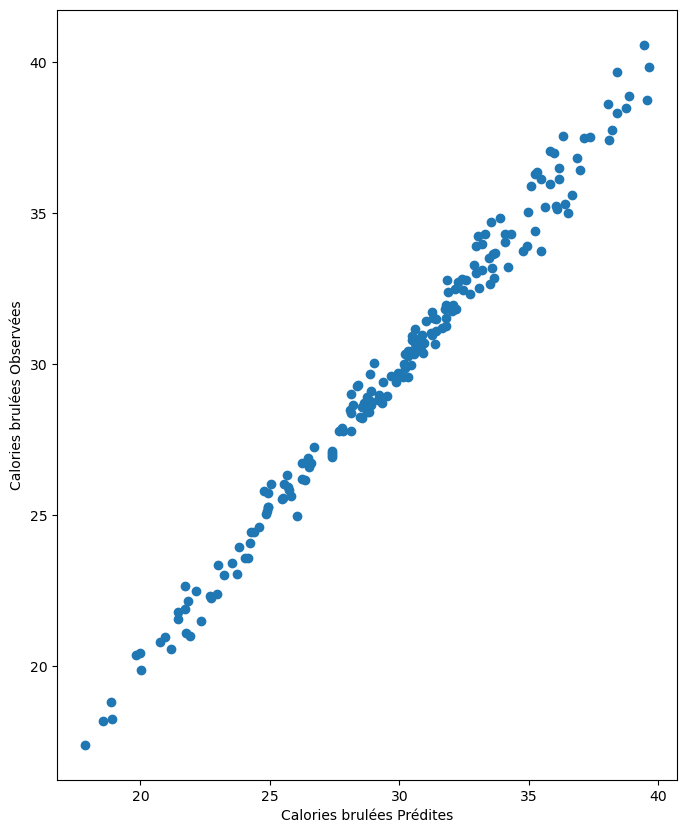

In [105]:
plt.plot(prev,Yc_test,"o")
plt.xlabel("Calories brulées Prédites")
plt.ylabel("Calories brulées Observées")
plt.show()

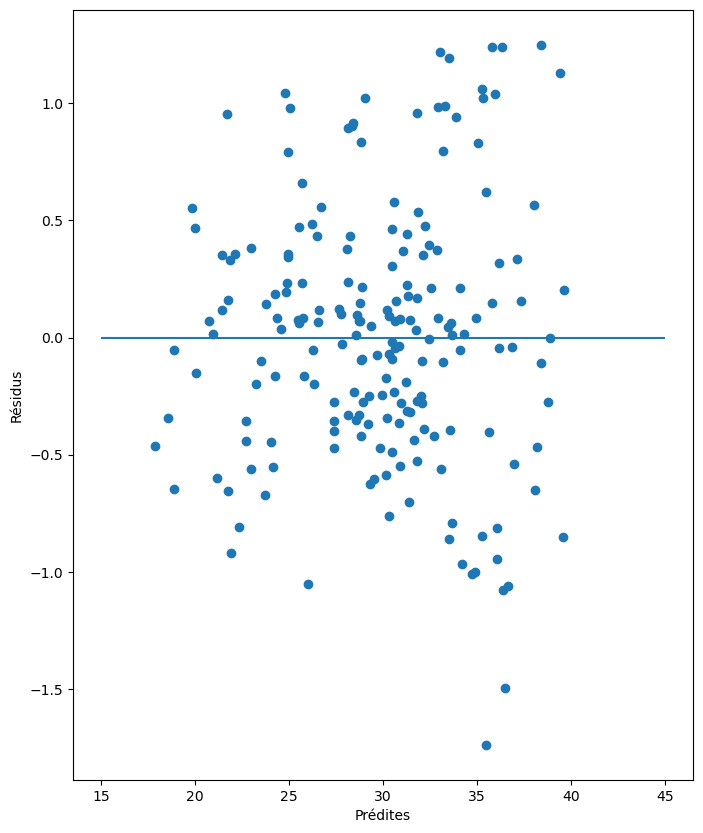

In [107]:
plt.plot(prev,Yc_test-prev,"o")
plt.xlabel("Prédites")
plt.ylabel("Résidus")
plt.hlines(0,15,45)
plt.show()

In [109]:
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(Xc_train,Yc_train)
model_lasso.coef_

array([-6.81521834e-01,  2.55265674e-15,  5.97896122e-03,  1.47981181e-04,
       -0.00000000e+00, -4.83762756e-02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  9.50240862e-02,
       -2.76907189e-01, -6.42472760e-01,  2.84130975e-02,  1.04480371e-02,
        0.00000000e+00,  1.46500680e+00,  7.82107517e-03,  4.32104500e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [111]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 13 variables et en supprime 10


Text(0.5, 1.0, 'Coefficients du modèle lasso')

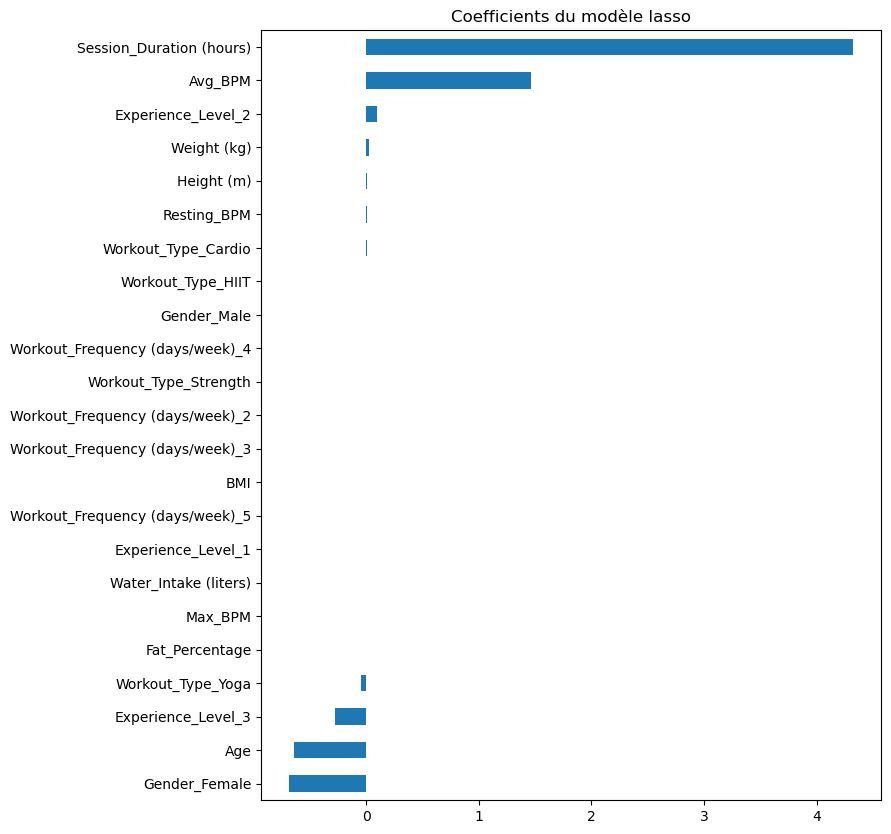

In [113]:
imp_coef = coef.sort_values()
#imp_coef = imp_coef.iloc[:-1]
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

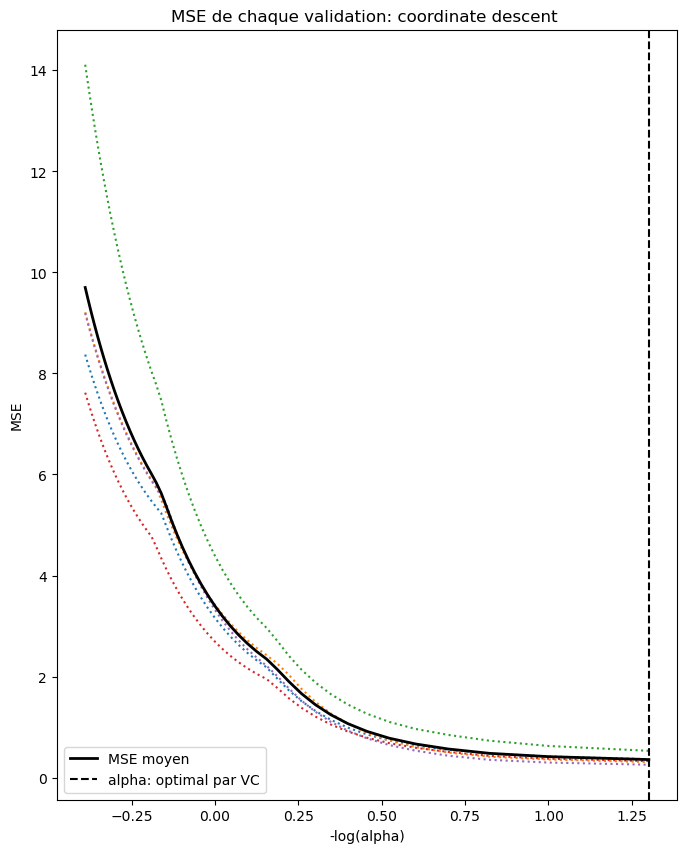

In [115]:
from sklearn.linear_model import LassoCV, LassoLarsCV
model = LassoCV(cv=5, alphas=np.array(range(1,50,1))/20.,n_jobs=-1,random_state=13).fit(Xc_train,Yc_train)
m_log_alphas = -np.log10(model.alphas_)

plt.figure()

plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: optimal par VC')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: coordinate descent ')
plt.show()

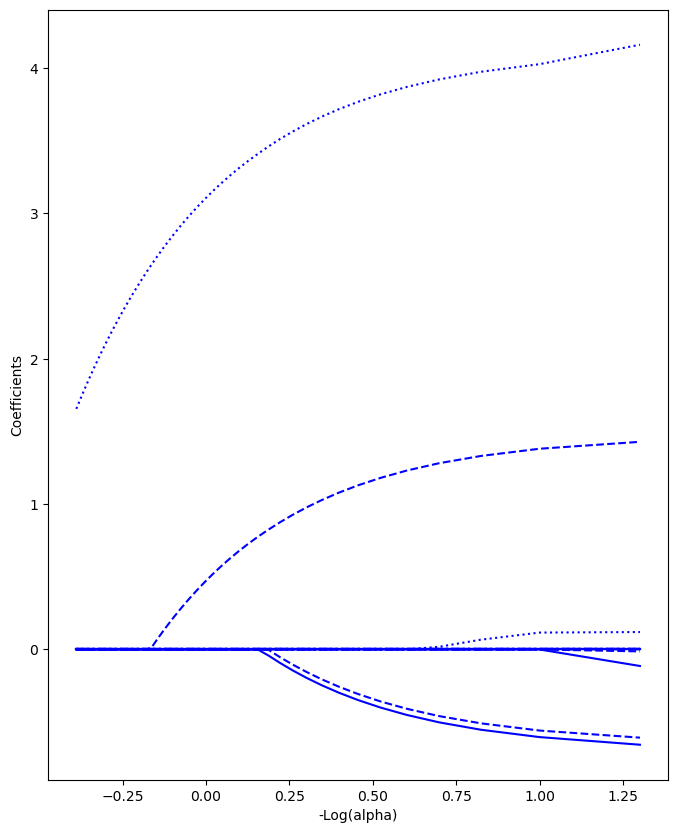

In [117]:
from itertools import cycle

from sklearn.linear_model import lasso_path
alphas_lasso, coefs_lasso, _ = lasso_path(Xc_train,Yc_train, alphas=np.array(range(1,50,1))/20.,)


plt.figure()
ax = plt.gca()

styles = cycle(['-', '--', '-.', ':'])

neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, s in zip(coefs_lasso, styles):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, linestyle=s,c='b')
plt.xlabel('-Log(alpha)')
plt.ylabel('Coefficients')
plt.show()

**On passe à Ridge**

In [120]:
regRidge = linear_model.Ridge()
regRidge.fit(Xc_train,Yc_train)
prev=regRidge.predict(Xc_test)
print("MSE=",mean_squared_error(Yc_test,prev))
print("R2=",r2_score(Yc_test,prev))

MSE= 0.30852194245768655
R2= 0.9875042930152391


In [122]:
param = [{"alpha": [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}]
regRidge = GridSearchCV(linear_model.Ridge(), param, cv=5, n_jobs=-1)
regRidgeOpt = regRidge.fit(Xc_train, Yc_train)
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regRidgeOpt.best_score_, regRidgeOpt.best_params_))

Meilleur R2 = 0.983606, Meilleur paramètre = {'alpha': 0.7}


In [124]:
prev=regRidgeOpt.predict(Xc_test)
print("MSE=",mean_squared_error(prev,Yc_test))
print("R2=",r2_score(Yc_test,prev))

MSE= 0.3085643209284715
R2= 0.9875025766091088


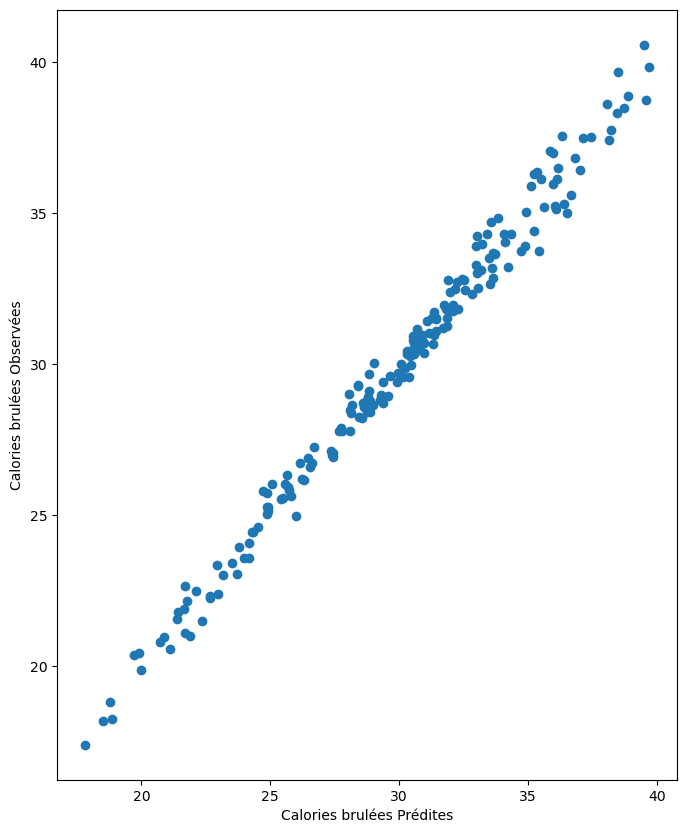

In [126]:
plt.plot(prev,Yc_test,"o")
plt.xlabel("Calories brulées Prédites")
plt.ylabel("Calories brulées Observées")
plt.show()

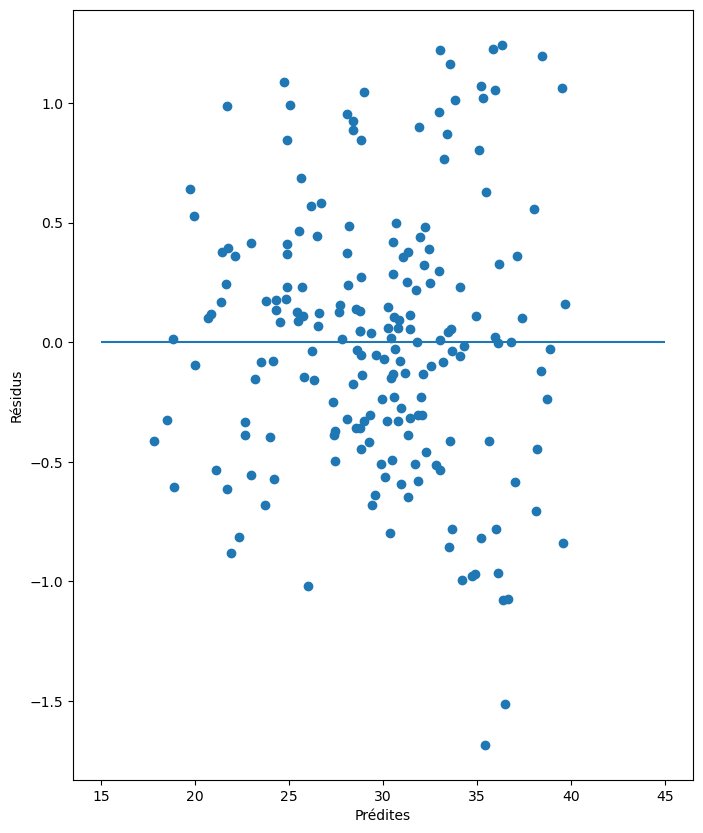

In [128]:
plt.plot(prev,Yc_test-prev,"o")
plt.xlabel("Prédites")
plt.ylabel("Résidus")
plt.hlines(0,15,45)
plt.show()

In [130]:
regRidge=linear_model.Ridge(alpha=regLassOpt.best_params_['alpha'])
model_ridge=regRidge.fit(Xc_train,Yc_train)
model_ridge.coef_

array([-3.38515118e-01,  3.38515118e-01,  2.41018685e-02,  1.83951487e-02,
        1.36464922e-03, -4.47384717e-02, -1.29702781e-02, -1.39312411e-02,
        1.19079593e-02,  2.13524174e-02,  8.12974857e-02,  1.56050124e-01,
       -2.95674404e-01, -6.52762332e-01,  2.04825956e-01, -7.24912689e-02,
        6.04079127e-04,  1.47389905e+00,  2.00478400e-02,  4.36270597e+00,
       -1.08548414e-02,  7.68461866e-03, -1.62668065e-01])

Text(0.5, 1.0, 'Coefficients du modèle ridge')

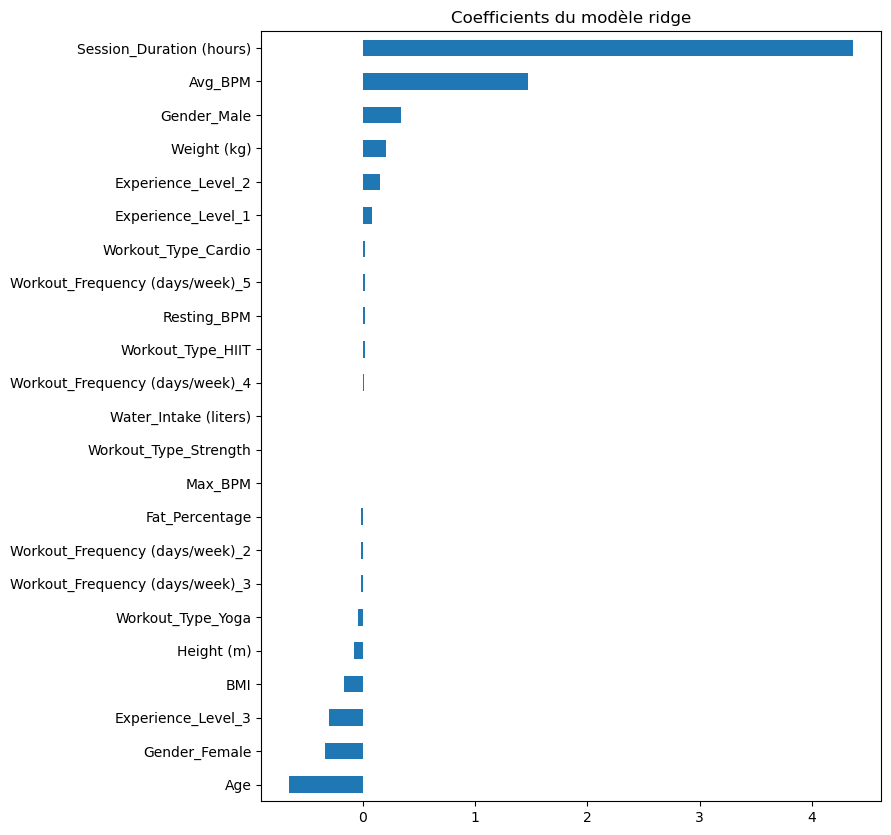

In [132]:
coef = pd.Series(model_ridge.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle ridge")

( Tracer "for each regularization method, the choice of the parameter λ is
determinant for the model selection. We see in next Figure the
Regularisation path, showing the profiles of the estimated
parameters when the tuning parameter λ increases.")

C:\Users\anter\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
C:\Users\anter\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


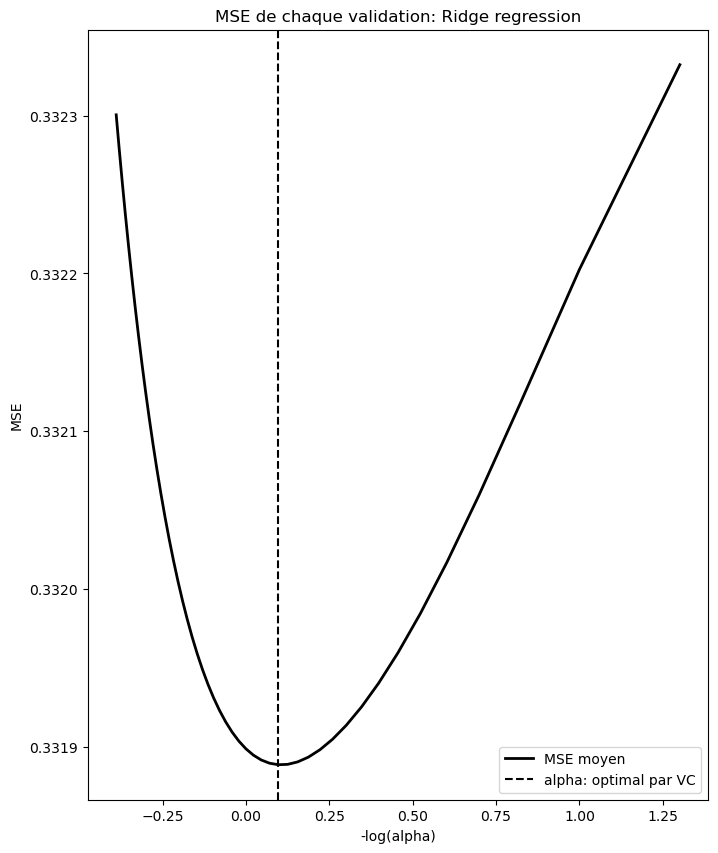

In [135]:
from sklearn.linear_model import RidgeCV

# Définition des valeurs de alpha à tester
alphas = np.array(range(1, 50, 1)) / 20.

# Modèle Ridge avec validation croisée
model = RidgeCV(alphas=alphas, store_cv_values=True).fit(Xc_train, Yc_train)

# Transformation de alpha en échelle logarithmique
m_log_alphas = -np.log10(alphas)

plt.figure()

# Tracé des erreurs de validation croisée
plt.plot(m_log_alphas, model.cv_values_.mean(axis=0), 'k', label='MSE moyen', linewidth=2)

# Ajout de la ligne correspondant au meilleur alpha trouvé
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k', label='alpha: optimal par VC')

plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: Ridge regression')
plt.show()

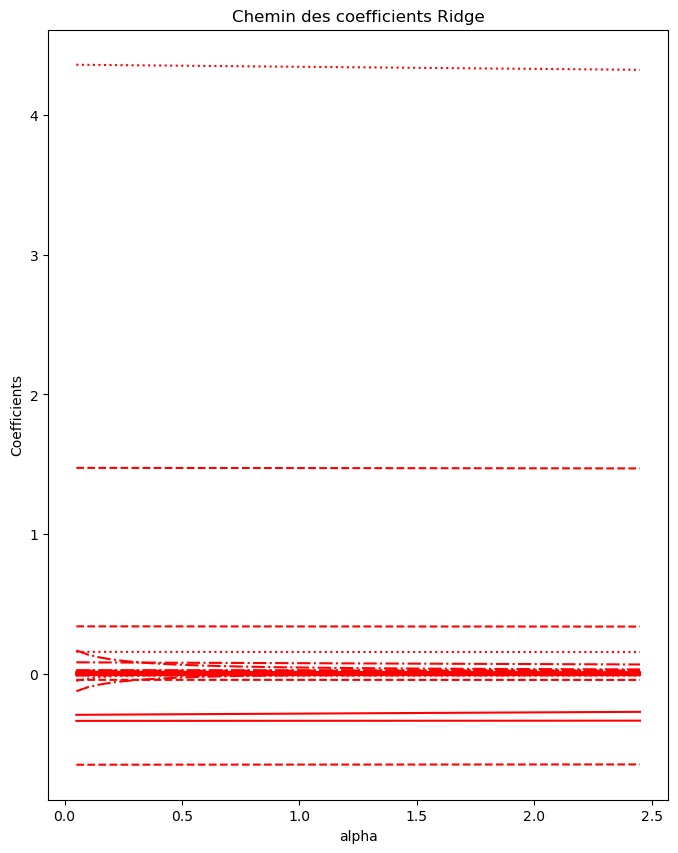

In [137]:
from itertools import cycle
from sklearn.linear_model import Ridge

# Définition des valeurs de alpha à tester
alphas_ridge = np.array(range(1, 50, 1)) / 20.

# Stocker les coefficients pour chaque alpha
coefs_ridge = []

# Boucle sur chaque valeur de alpha
for alpha in alphas_ridge:
    ridge = Ridge(alpha=alpha)
    ridge.fit(Xc_train, Yc_train)
    coefs_ridge.append(ridge.coef_)

# Convertir en array pour faciliter l'affichage
coefs_ridge = np.array(coefs_ridge).T

# Tracé des coefficients en fonction de -log(alpha)
plt.figure()
ax = plt.gca()
styles = cycle(['-', '--', '-.', ':'])


for coef_r, s in zip(coefs_ridge, styles):
    plt.plot(alphas_ridge, coef_r, linestyle=s, c='r')

plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Chemin des coefficients Ridge')
plt.show()

# SVM/SVR

In [140]:
from sklearn.svm import SVR

param = [{"C": [0.4, 0.5, 0.6, 0.8, 1, 1.4]}]
svm = GridSearchCV(SVR(), param, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xc_train, Yc_train) 

print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))


Meilleur score = 0.039714, Meilleur paramètre = {'C': 1.4}


In [142]:
Y_pred = svmOpt.predict(Xc_test)
mse = mean_squared_error(Yc_test, Y_pred)
print("MSE =", mse)

MSE = 0.6450572375708507


C:\Users\anter\AppData\Local\Temp\ipykernel_13680\3264346780.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


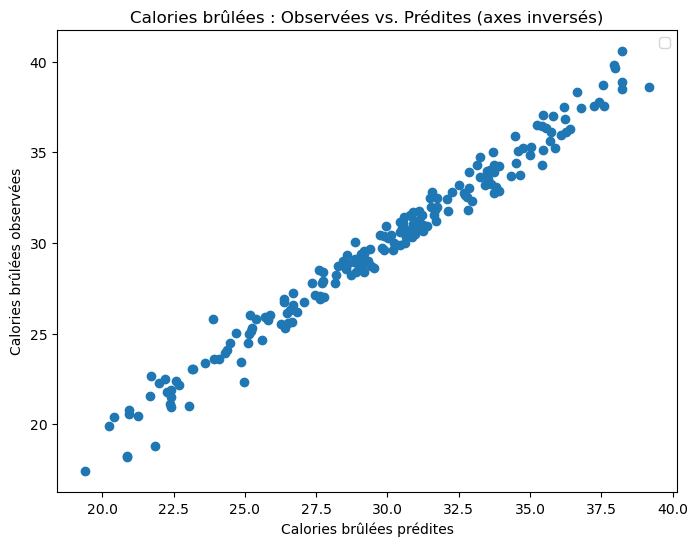

In [144]:
# Tracé des calories prédites vs. calories observées (axes inversés)
plt.figure(figsize=(8,6))
plt.scatter(Y_pred, Yc_test)

# Ajout des labels et titre
plt.xlabel("Calories brûlées prédites")
plt.ylabel("Calories brûlées observées")
plt.title("Calories brûlées : Observées vs. Prédites (axes inversés)")
plt.legend()
plt.show()


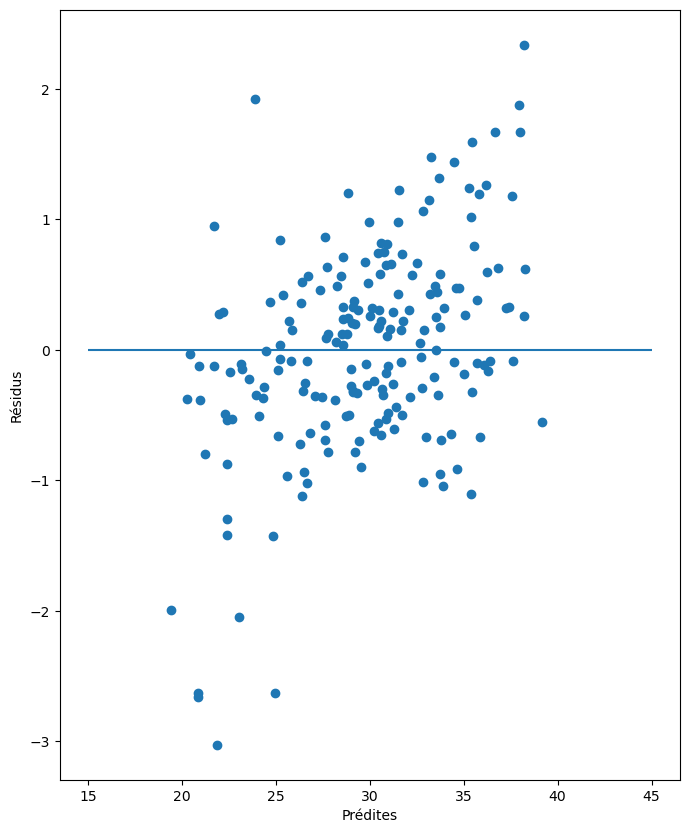

In [146]:
plt.plot(Y_pred,Yc_test-Y_pred,"o")
plt.xlabel("Prédites")
plt.ylabel("Résidus")
plt.hlines(0,15,45)
plt.show()

# Classification

In [169]:
# 1. Cible à expliquer : Experience_Level (multiclasse 0/1/2)
le = LabelEncoder()
dfC = data.copy()
y = le.fit_transform(dfC['Experience_Level'])

# 2. Préparation des variables explicatives
X = dfC.drop('Experience_Level', axis=1)

# 3. Encodage manuel des variables qualitatives
X = pd.get_dummies(X, columns=['Gender', 'Workout_Type', 'Workout_Frequency (days/week)'], drop_first=True)
# 4. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 5. Standardisation des variables (important pour certains modèles)
scaler = StandardScaler()
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



## Regression logistique

Sans pénalisation:

In [268]:
logit = LogisticRegression(penalty=None, solver="lbfgs", multi_class='ovr', max_iter=1000)

# Entraînement sur l'échantillon d'entraînement
logitOpt = logit.fit(X_train_scaled, y_train)

# Évaluation sur le test
print("Précision test :", logitOpt.score(X_test_scaled, y_test))
print("Erreur test :", 1 - logitOpt.score(X_test_scaled, y_test))

Précision test : 0.8666666666666667
Erreur test : 0.1333333333333333


C:\Users\anter\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [270]:
# Prédictions sur le test
y_pred = logitOpt.predict(X_test_scaled)

# Matrice de confusion
table = pd.crosstab(y_pred, y_test, rownames=['Prédit'], colnames=['Réel'])
print("Matrice de confusion :")
print(table)

Matrice de confusion :
Réel     0   1   2
Prédit            
0       63  14   0
1       12  68   0
2        0   0  38


In [272]:
# Coefficients pour chaque classe
logitCoef = logitOpt.coef_

for i, coef in enumerate(logitCoef):
    print(f"Coefficients pour la classe {i} :")
    print(coef)

# Associer les coefficients aux noms de variables
feature_names = X.columns  # après get_dummies()
for i, coef in enumerate(logitCoef):
    print(f"\nClasse {i} :")
    for name, val in zip(feature_names, coef):
        if val != 0:
            print(f"  {name:30s} -> {val:+.3f}")


Coefficients pour la classe 0 :
[-1.73523849e-01 -1.08166567e-01  4.72591445e-01 -1.19273483e-02
  4.77524416e-01  2.89003860e-02  1.55910282e-01 -1.76617794e+00
  1.40612804e-01  5.70530485e-02  2.11625185e-01 -1.66687797e-01
  9.26629085e-03 -1.06351288e-01 -1.78462158e-01 -1.00007313e+01
 -1.91919027e+01 -1.15154637e+01]
Coefficients pour la classe 1 :
[ 8.81496257e-01 -1.79908969e-01 -2.77462757e-01 -5.24458341e-02
 -1.75543327e+00 -1.60442176e-01 -5.26454414e+00  6.02110772e+00
  1.37999152e+00 -6.91436087e-01  7.62647260e-04  4.65759538e-01
  1.29820694e-01  7.07058184e-02  1.87285821e-01  9.61348446e+00
  1.04281706e+01 -1.75182056e+00]
Coefficients pour la classe 2 :
[ 0.30895951  0.19940617  0.34265972  0.59929298 -0.73013477  0.06941533
  4.63759991  1.35383092 -8.31226879  1.55877728  0.02877848 -4.07003792
  0.10936746  0.38758181  0.20478194 -0.23533603  0.88439329  3.52375249]

Classe 0 :
  Age                            -> -0.174
  Weight (kg)                    -> -0.10

Classe 0 – Débutant
Variables positives :

Avg_BPM (+0.478), Height (+0.473), BMI, Water_Intake → un certain niveau d’activité, mais modéré

Variables négatives :

Calories_Burned (-1.766) → ils brûlent peu de calories

Très forte baisse si fréquence d'entraînement est de 3, 4 ou 5 jours (-10 à -19) → débutants s'entraînent très peu

Conclusion : Les débutants sont peu réguliers, ont une intensité modérée, s’entraînent rarement.

Classe 1 – Intermédiaire
Variables positives :

Calories_Burned (+6.021) → intermédiaires très actifs

Fat_Percentage, Gender_Male, Workout_Frequency_3/4 jours → profil typique d’un membre engagé, encore en progression

Variables négatives :

Avg_BPM, Session_Duration (-5.265) → intensité pas encore aussi forte que les experts

Conclusion : Les intermédiaires sont actifs et réguliers (3-4 séances), mais avec des séances moins longues et intenses que les experts.

Classe 2 – Expert
Variables positives :

Session_Duration (+4.638), Calories_Burned, Workout_Frequency_5 jours → experts s'entraînent beaucoup, longtemps, souvent

Water_Intake (+1.559) → bon indicateur d’intensité

Variables négatives :

Fat_Percentage (-8.312) → très faible masse grasse

Gender_Male (-4.070) → cela indique que dans ce dataset, les femmes sont plus nombreuses chez les experts (intéressant)

Conclusion : Les experts ont des séances longues et intenses, un très bon profil physiologique, et s’entraînent fréquemment.

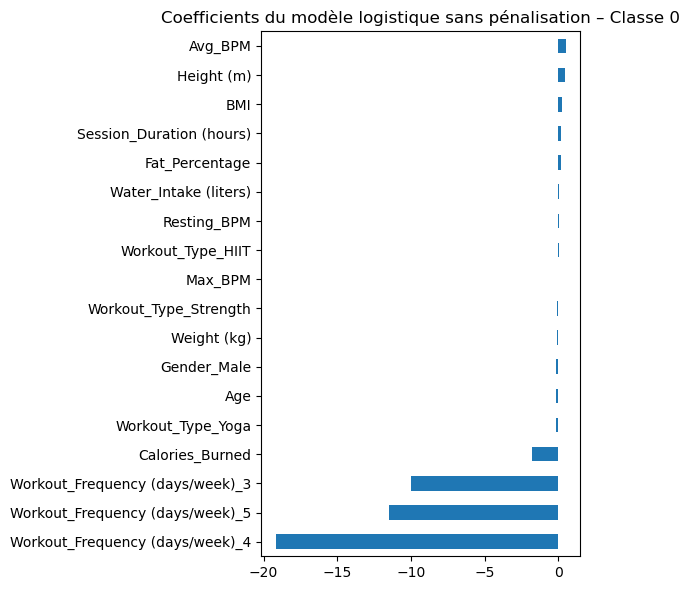

In [275]:
classe = 0  
coef = pd.Series(logitCoef[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients du modèle logistique sans pénalisation – Classe {classe}")
plt.tight_layout()
plt.show()


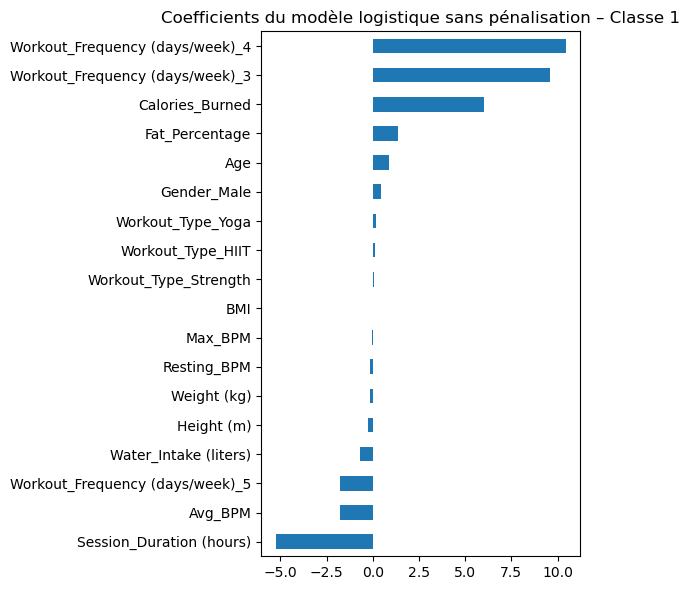

In [276]:
classe = 1
coef = pd.Series(logitCoef[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients du modèle logistique sans pénalisation – Classe {classe}")
plt.tight_layout()
plt.show()


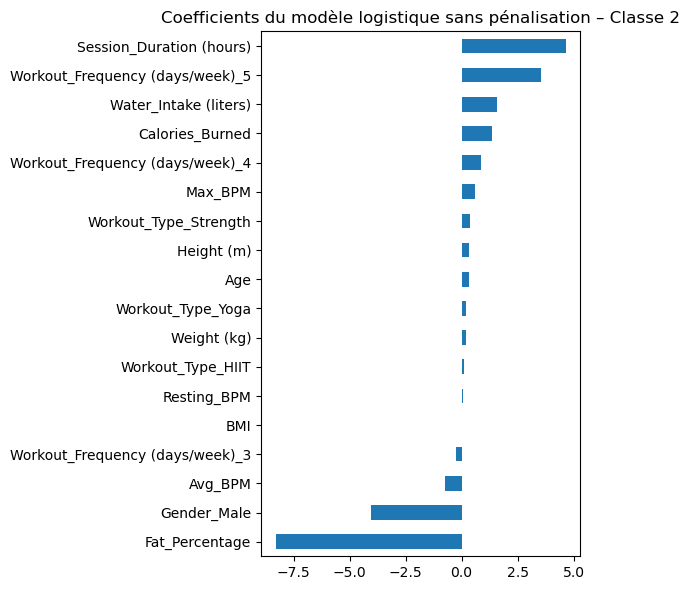

In [277]:
classe = 2
coef = pd.Series(logitCoef[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients du modèle logistique sans pénalisation – Classe {classe}")
plt.tight_layout()
plt.show()


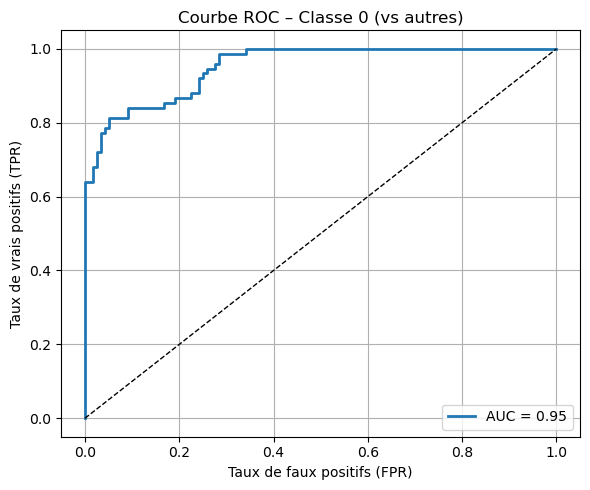

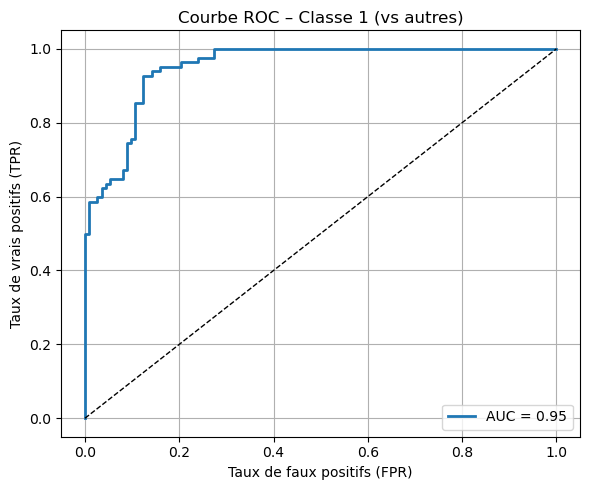

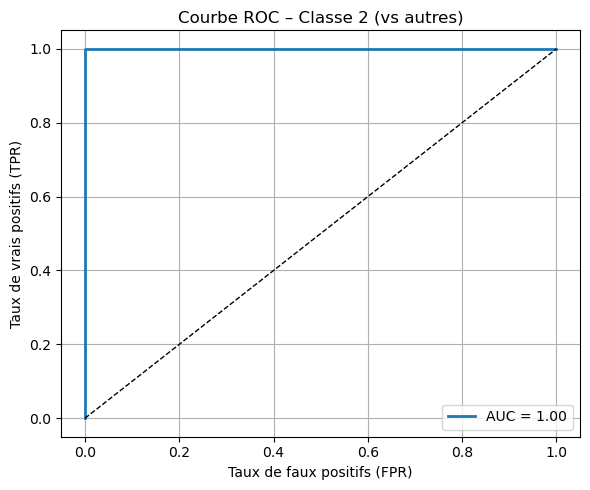

In [279]:
# 1. Binarisation des classes (0, 1, 2) → vecteurs one-hot
# Exemple : 0 → [1,0,0], 1 → [0,1,0], etc.
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# 2. Prédiction des probabilités sur l'échantillon test
# logitOpt est le modèle logistique sans pénalisation
y_score = logitOpt.predict_proba(X_test_scaled)

# 3. Courbe ROC par classe (one-vs-rest)
for i in range(n_classes):
    # ROC pour : classe i vs toutes les autres
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)

    # Affichage
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (vs autres)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Lasso:

In [286]:
# Optimisation du paramètre de pénalisation
# grille de valeurs
param=[{"C":[1,1.2,1.5,1.7,2,3,4]}]
logit_L1 = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"), param,cv=5,n_jobs=-1)
logitOpt_L1=logit_L1.fit(X_train_scaled, Y_train)  # GridSearchCV est lui-même un estimateur
# paramètre optimal
logitOpt_L1.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-logitOpt_L1.best_score_,logitOpt_L1.best_params_))

Meilleur score = 0.137527, Meilleur paramètre = {'C': 1.2}


In [288]:
print("Précision test :", logitOpt_L1.score(X_test_scaled, y_test))
print("Erreur test :", 1 - logitOpt_L1.score(X_test_scaled, y_test))

Précision test : 0.8666666666666667
Erreur test : 0.1333333333333333


In [292]:
y_pred = logitOpt_L1.predict(X_test_scaled)
table = pd.crosstab(y_pred, y_test, rownames=['Prédit'], colnames=['Réel'])
print("Matrice de confusion :")
print(table)

Matrice de confusion :
Réel     0   1   2
Prédit            
0       63  14   0
1       12  68   0
2        0   0  38


Le modèle prédit très bien la classe 2 (expert), mais confond parfois les classes 0 (débutant) et 1 (intermédiaire), notamment 14 débutants pris pour intermédiaires et 12 intermédiaires pris pour débutants.

In [299]:
# Réentraîner le modèle avec le meilleur C
logitLasso = LogisticRegression(
    penalty="l1",
    C=logitOpt_L1.best_params_['C'],
    solver="liblinear",
    multi_class='ovr',
    max_iter=1000
)

logitLasso.fit(X_train_scaled, y_train)

# Coefficients : un vecteur par classe (car classification multiclasse)
logitCoef = logitLasso.coef_

# Affichage des coefficients pour chaque classe
for i, coef in enumerate(logitCoef):
    print(f"Coefficients pour la classe {i} :")
    print(coef)

Coefficients pour la classe 0 :
[-0.07994467  0.07035074  0.30920592  0.          0.2707341   0.00817476
 -0.41797398 -1.11582705  0.14638475  0.01008085  0.         -0.15744491
  0.01420992 -0.08133603 -0.14806594 -2.58982157 -5.04530494 -2.43273258]
Coefficients pour la classe 1 :
[ 0.60488067 -0.13220519 -0.23611659 -0.02878922 -1.1450515  -0.13056192
 -3.50014143  4.10796708  1.35040691 -0.67579612  0.          0.67490475
  0.08044701  0.0289671   0.1312004   2.57039514  3.54778338  0.        ]
Coefficients pour la classe 2 :
[ 0.          0.          0.          0.          0.          0.
  2.64989215  0.         -4.65640035  0.13906034  0.         -1.40010428
  0.          0.          0.         -0.22056977  0.17961889  0.59830305]


C:\Users\anter\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [301]:
feature_names = X.columns  # après get_dummies()
for i, coef in enumerate(logitCoef):
    print(f"\nClasse {i} :")
    for name, val in zip(feature_names, coef):
        if val != 0:
            print(f"  {name:30s} -> {val:+.3f}")


Classe 0 :
  Age                            -> -0.080
  Weight (kg)                    -> +0.070
  Height (m)                     -> +0.309
  Avg_BPM                        -> +0.271
  Resting_BPM                    -> +0.008
  Session_Duration (hours)       -> -0.418
  Calories_Burned                -> -1.116
  Fat_Percentage                 -> +0.146
  Water_Intake (liters)          -> +0.010
  Gender_Male                    -> -0.157
  Workout_Type_HIIT              -> +0.014
  Workout_Type_Strength          -> -0.081
  Workout_Type_Yoga              -> -0.148
  Workout_Frequency (days/week)_3 -> -2.590
  Workout_Frequency (days/week)_4 -> -5.045
  Workout_Frequency (days/week)_5 -> -2.433

Classe 1 :
  Age                            -> +0.605
  Weight (kg)                    -> -0.132
  Height (m)                     -> -0.236
  Max_BPM                        -> -0.029
  Avg_BPM                        -> -1.145
  Resting_BPM                    -> -0.131
  Session_Duration (hours) 

Classe 0 (Débutant)
Le profil type d’un débutant :

A une grande taille (+0.309) et un poids légèrement supérieur

A un battement moyen élevé (Avg_BPM +0.261)

A tendance à faire des séances plus courtes (Session_Duration -0.448) et brûle peu de calories (Calories_Burned -1.085)

Fait rarement plus de 3 séances par semaine : effet très négatif des fréquences 3, 4 et 5

Est plutôt femme (Gender_Male -0.163)

Ne pratique pas ou peu de musculation ou yoga

Conclusion : Le débutant est physiquement actif mais peu expérimenté, avec des entraînements légers et peu fréquents.

Classe 1 (Intermédiaire)
Le profil type d’un intermédiaire :

A un âge plus élevé (+0.605)

A un IMC plus faible (taille et poids avec coefficients négatifs)

Fait des séances longues mais avec fréquence cardiaque modérée (Avg_BPM -1.145, Session_Duration -3.501)

Brûle beaucoup de calories (+4.108)

A un fort pourcentage de graisse (+1.350)

Fait souvent 3 à 4 séances/semaine (coefficients fortement positifs)

Est plutôt homme (Gender_Male +0.675)

Conclusion : L’intermédiaire est quelqu’un de régulier, actif, et expérimenté, mais peut encore améliorer sa condition physique.

Classe 2 (Expert)
Le profil type d’un expert :

Fait des séances longues (Session_Duration +2.656)

A un très faible taux de graisse corporelle (Fat_Percentage -4.657)

Boit légèrement plus d’eau

Est souvent une femme (Gender_Male -1.398)

A tendance à s'entraîner 4 à 5 fois par semaine

Conclusion : L’expert est une personne très régulière, avec un entraînement long, une excellente condition physique, peu de graisse, et une pratique avancée.

In [304]:
# logitCoef contient les coefficients pour chaque classe
# Ici on fait l’analyse pour chaque classe séparément

for i, coef_vect in enumerate(logitLasso.coef_):
    coef = pd.Series(coef_vect, index=X.columns)
    n_non_zero = (coef != 0).sum()
    n_zero = (coef == 0).sum()
    print(f"Classe {i} : Lasso conserve {n_non_zero} variables et en supprime {n_zero}")

Classe 0 : Lasso conserve 16 variables et en supprime 2
Classe 1 : Lasso conserve 16 variables et en supprime 2
Classe 2 : Lasso conserve 7 variables et en supprime 11


In [306]:
for i, coef_vect in enumerate(logitLasso.coef_):
    coef = pd.Series(coef_vect, index=X.columns)
    kept = coef[coef != 0].index.tolist()
    removed = coef[coef == 0].index.tolist()
    
    print(f"\nClasse {i} :")
    print(f"Variables conservées ({len(kept)}): {kept}")
    print(f"Variables supprimées ({len(removed)}): {removed}")


Classe 0 :
Variables conservées (16): ['Age', 'Weight (kg)', 'Height (m)', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Gender_Male', 'Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga', 'Workout_Frequency (days/week)_3', 'Workout_Frequency (days/week)_4', 'Workout_Frequency (days/week)_5']
Variables supprimées (2): ['Max_BPM', 'BMI']

Classe 1 :
Variables conservées (16): ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Gender_Male', 'Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga', 'Workout_Frequency (days/week)_3', 'Workout_Frequency (days/week)_4']
Variables supprimées (2): ['BMI', 'Workout_Frequency (days/week)_5']

Classe 2 :
Variables conservées (7): ['Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)', 'Gender_Male', 'Workout_Frequency (days/we

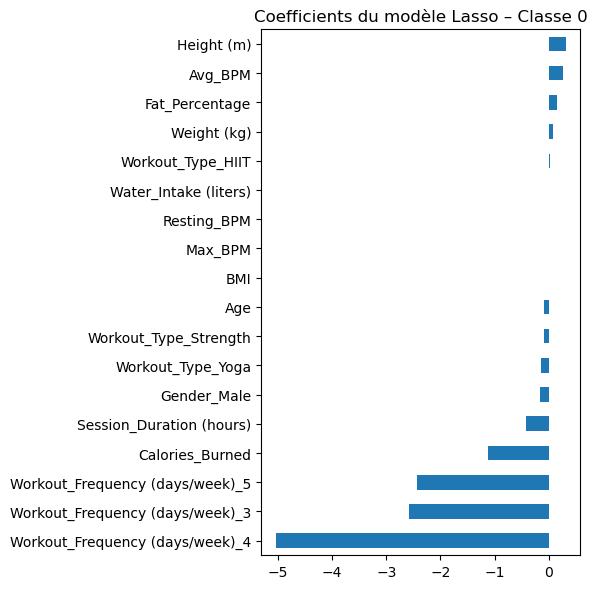

In [308]:
classe = 0  
coef = pd.Series(logitLasso.coef_[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients du modèle Lasso – Classe {classe}")
plt.tight_layout()
plt.show()

Pour la classe des débutants, on voit surtout que ce sont les variables Workout_Frequency qui influencent le plus, elles influencent négativement donc on peut supposer que le modele se base surtout sur les personnes qui ne font pas beaucoup de sport par semaine.

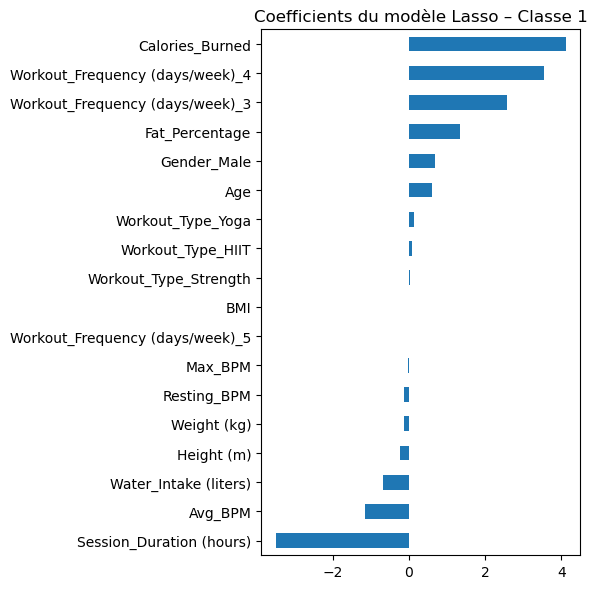

In [311]:
classe = 1  
coef = pd.Series(logitLasso.coef_[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients du modèle Lasso – Classe {classe}")
plt.tight_layout()
plt.show()

Pour la classe des intermédiaires, on voit surtout que ce sont les variables Calories_Burned, Workout_frequency 4 et 3 (positivement) et Session_Duration (négativement) qui influencent le plus,  donc on peut supposer que le modele se base surtout sur les personnes qui s’entraînent souvent mais moins longtemps, et brûlent beaucoup de calories.

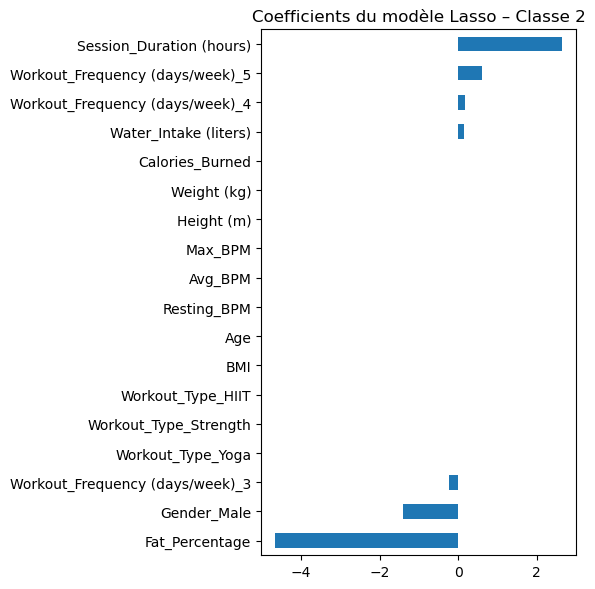

In [314]:
classe = 2  
coef = pd.Series(logitLasso.coef_[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients du modèle Lasso – Classe {classe}")
plt.tight_layout()
plt.show()

Pour la classe des experts, on voit surtout que ce sont les variables Session_Duration (positivement) et Fat_Percentage (négativement) qui influencent le plus, donc on peut supposer que le modele se base surtout sur les personnes qui s’entraînent longtemps et ont un très faible taux de graisse corporel.

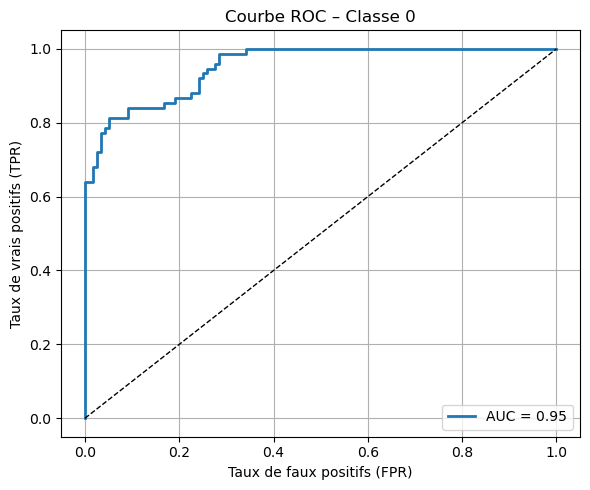

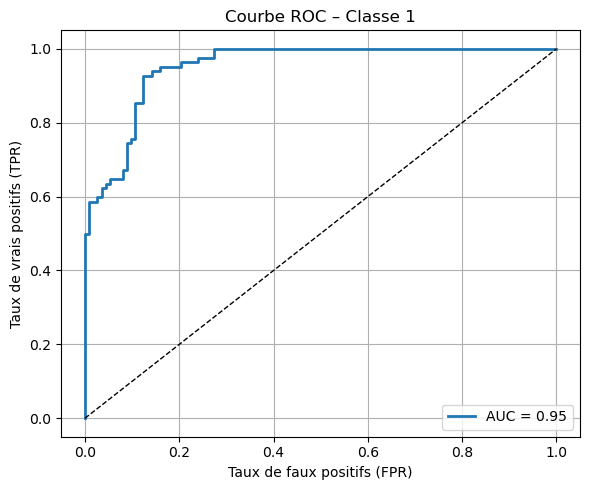

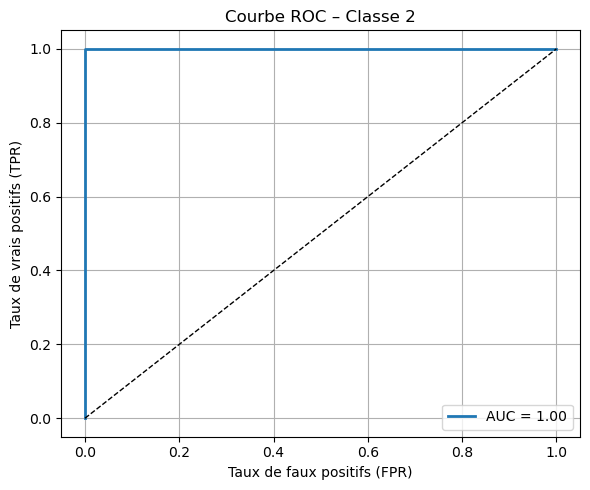

In [317]:
# 1. Binariser la variable cible y_test (ex : 0, 1, 2 → one-hot)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# 2. Prédiction des probabilités avec le modèle logitOpt
y_score = logitOpt.predict_proba(X_test_scaled)

# 3. Affichage d'une courbe ROC pour chaque classe, séparément
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Ridge:

In [319]:
# 1. Grille de valeurs pour C (inverse de la régularisation L2)
param = [{"C": [0.1, 0.5, 1, 2, 3, 4, 5]}]

# 2. GridSearchCV avec pénalisation Ridge
logit_L2 = GridSearchCV(
    LogisticRegression(penalty="l2", solver="lbfgs", multi_class='ovr', max_iter=1000),
    param_grid=param,
    cv=5,
    n_jobs=-1
)
logitOpt_L2 = logit_L2.fit(X_train_scaled, y_train)

# 3. Résultats validation croisée + test
print("Meilleur paramètre C :", logitOpt_L2.best_params_['C'])
print("Meilleur score :",1- logitOpt_L2.best_score_)

Meilleur paramètre C : 2
Meilleur score : 0.13881720430107514


C:\Users\anter\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [321]:
print("Précision test :", logitOpt_L2.score(X_test_scaled, y_test))
print("Erreur test :", 1 - logitOpt_L2.score(X_test_scaled, y_test))


Précision test : 0.8769230769230769
Erreur test : 0.12307692307692308


In [323]:
y_pred = logitOpt_L2.predict(X_test_scaled)
table = pd.crosstab(y_pred, y_test, rownames=['Prédit'], colnames=['Réel'])
print("\nMatrice de confusion :")
print(table)


Matrice de confusion :
Réel     0   1   2
Prédit            
0       64  13   0
1       11  69   0
2        0   0  38


In [325]:
# 5. Coefficients par classe
logitCoef = logitOpt_L2.best_estimator_.coef_

for i, coef in enumerate(logitCoef):
    print(f"\nCoefficients pour la classe {i} :")
    print(coef)

# 6. Associer noms des variables
feature_names = X.columns
for i, coef in enumerate(logitCoef):
    print(f"\nClasse {i} :")
    for name, val in zip(feature_names, coef):
        if val != 0:
            print(f"  {name:30s} -> {val:+.3f}")



Coefficients pour la classe 0 :
[-0.08581841  0.05782785  0.35073032 -0.00891265  0.26549808  0.02218425
 -0.52983539 -1.02389968  0.18384832  0.05033983  0.02583296 -0.20753095
  0.01841012 -0.0945499  -0.16053688 -2.21114452 -4.45625299 -2.18038805]

Coefficients pour la classe 1 :
[ 0.48075462 -0.11994001 -0.25506669 -0.03103361 -0.86406685 -0.13256822
 -2.64300175  3.20484554  1.38013915 -0.70475895 -0.01134554  0.85723347
  0.09995036  0.04467513  0.14417781  2.41734159  3.3887237  -0.11618751]

Coefficients pour la classe 2 :
[ 0.1118075  -0.04180993 -0.04376189  0.12324801 -0.52125004  0.04099186
  2.31488767  1.17601919 -3.33874332  0.87799267 -0.02023178 -1.50306026
  0.15251303  0.00487488  0.08465376 -0.46886292  0.73586297  1.05699487]

Classe 0 :
  Age                            -> -0.086
  Weight (kg)                    -> +0.058
  Height (m)                     -> +0.351
  Max_BPM                        -> -0.009
  Avg_BPM                        -> +0.265
  Resting_BPM 

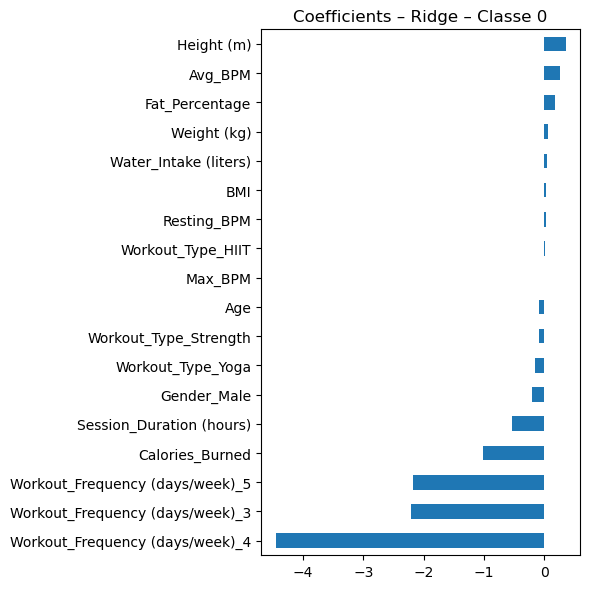

In [327]:
# 9. Visualisation des coefficients pour une classe
classe = 0  # à changer pour 1 ou 2
coef = pd.Series(logitCoef[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients – Ridge – Classe {classe}")
plt.tight_layout()
plt.show()

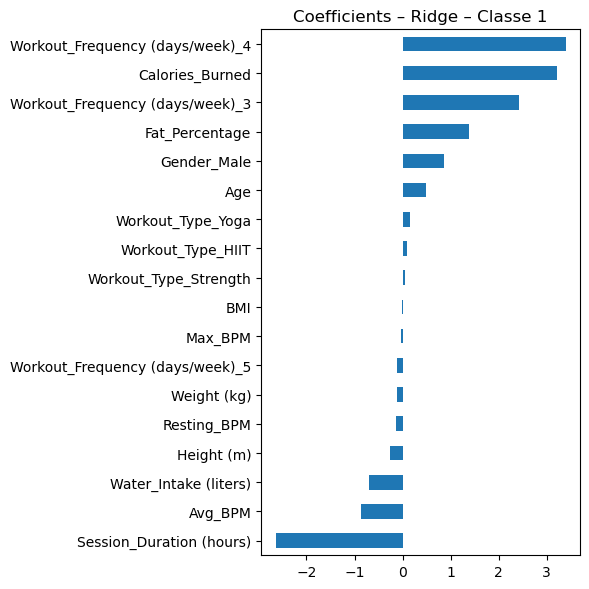

In [329]:
classe = 1
coef = pd.Series(logitCoef[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients – Ridge – Classe {classe}")
plt.tight_layout()
plt.show()

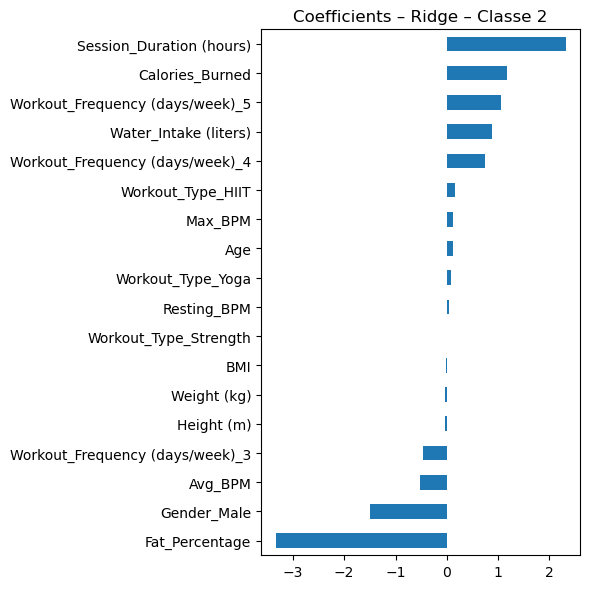

In [331]:
classe = 2
coef = pd.Series(logitCoef[classe], index=X.columns)
imp_coef = coef.sort_values()

plt.figure(figsize=(6, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients – Ridge – Classe {classe}")
plt.tight_layout()
plt.show()

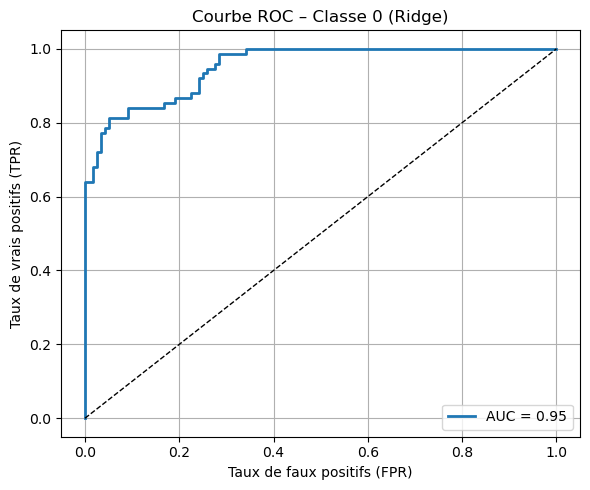

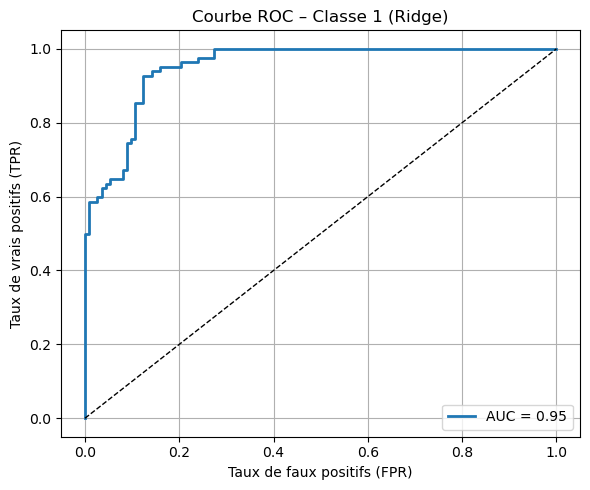

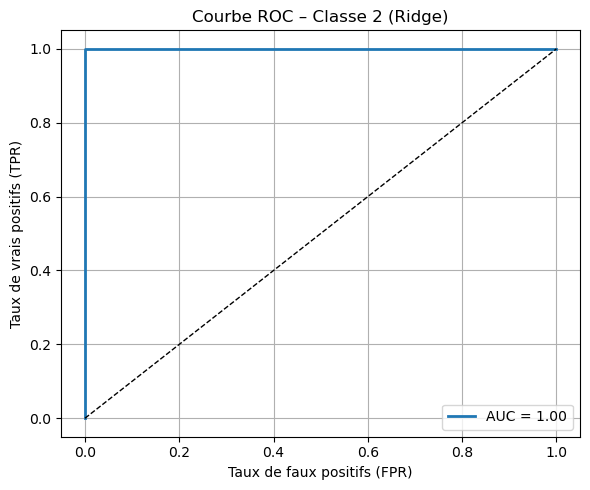

In [333]:
# 10. Courbes ROC par classe
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = logitOpt.predict_proba(X_test_scaled)

for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (Ridge)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Comparaison:

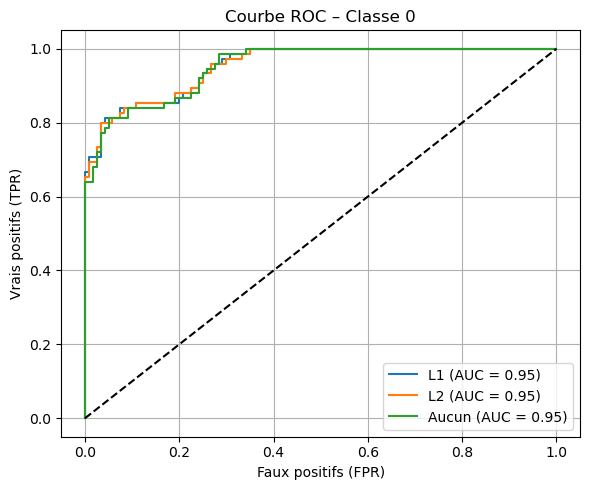

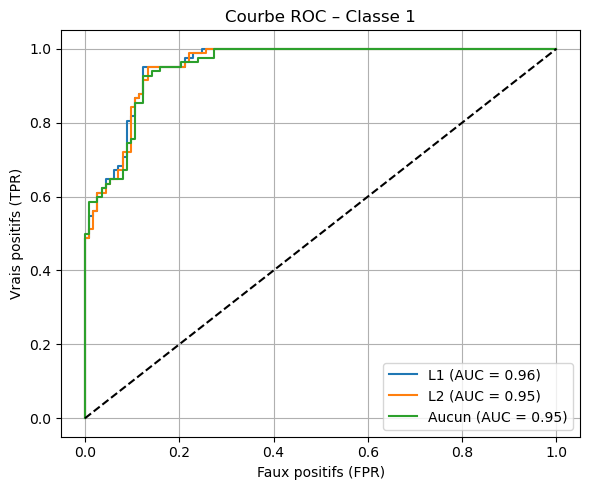

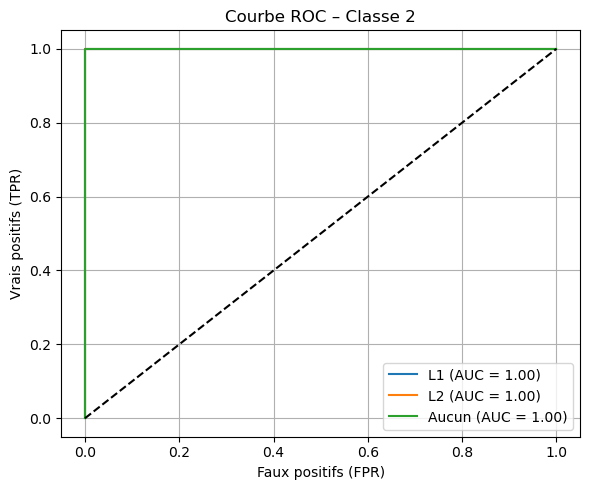

In [335]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Obtenir les prédictions
y_score_L1 = logitOpt_L1.predict_proba(X_test_scaled)
y_score_L2 = logitOpt_L2.predict_proba(X_test_scaled)
y_score_none = logitOpt.predict_proba(X_test_scaled)

for i in range(3):  # pour chaque classe
    fpr_l1, tpr_l1, _ = roc_curve(y_test_bin[:, i], y_score_L1[:, i])
    fpr_l2, tpr_l2, _ = roc_curve(y_test_bin[:, i], y_score_L2[:, i])
    fpr_np, tpr_np, _ = roc_curve(y_test_bin[:, i], y_score_none[:, i])

    auc_l1 = auc(fpr_l1, tpr_l1)
    auc_l2 = auc(fpr_l2, tpr_l2)
    auc_np = auc(fpr_np, tpr_np)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr_l1, tpr_l1, label=f"L1 (AUC = {auc_l1:.2f})")
    plt.plot(fpr_l2, tpr_l2, label=f"L2 (AUC = {auc_l2:.2f})")
    plt.plot(fpr_np, tpr_np, label=f"Aucun (AUC = {auc_np:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')

    plt.xlabel("Faux positifs (FPR)")
    plt.ylabel("Vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


La régression logistique avec une régression Lasso est un tout petit peu meilleure.

## SVC

Avec noyau gaussien:

In [341]:
from sklearn.svm import SVC

In [378]:
# 1. Définir la grille d’hyperparamètre (ici C uniquement)
param_grid = {
    'C': [0.1, 0.5, 0.8 ,1, 2, 5, 8],
    'gamma': [0.005,0.01, 0.1, 0.5, 1],
    'kernel': ['rbf']
}

# 2. Initialiser le modèle SVC
# Pour classification multiclasse, SVC gère One-vs-One automatiquement
svm = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid=param_grid, cv=5, n_jobs=-1)
# 3. Entraînement sur l’échantillon d’apprentissage
svmOpt = svm.fit(X_train_scaled, y_train)

# 4. Affichage du meilleur paramètre et score validation croisée
print("Meilleur score :",1 - svmOpt.best_score_)
print("Meilleurs hyperparamètres :", svmOpt.best_params_)

Meilleur score : 0.11567411083540124
Meilleurs hyperparamètres : {'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}


In [380]:
# 5. Évaluation sur l’échantillon test
print("Précision test :", svmOpt.score(X_test_scaled, y_test))
print("Erreur test :", 1 - svmOpt.score(X_test_scaled, y_test))

Précision test : 0.882051282051282
Erreur test : 0.11794871794871797


In [382]:
# 6. Prédictions sur test
y_pred = svmOpt.predict(X_test_scaled)

# 7. Matrice de confusion
table = pd.crosstab(y_pred, y_test, rownames=['Prédit'], colnames=['Réel'])
print("\nMatrice de confusion :")
print(table)


Matrice de confusion :
Réel     0   1   2
Prédit            
0       61   9   0
1       14  73   0
2        0   0  38


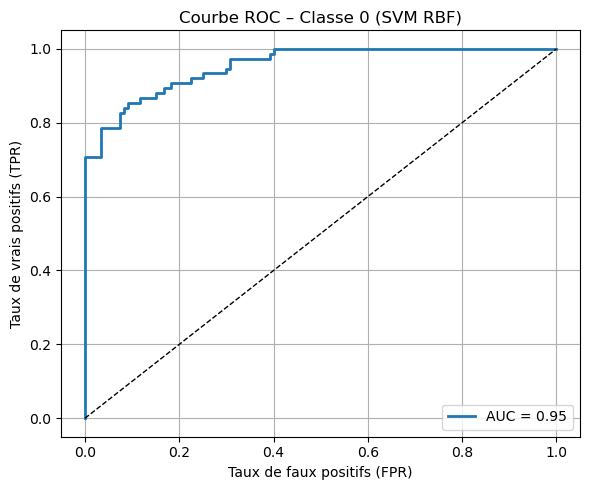

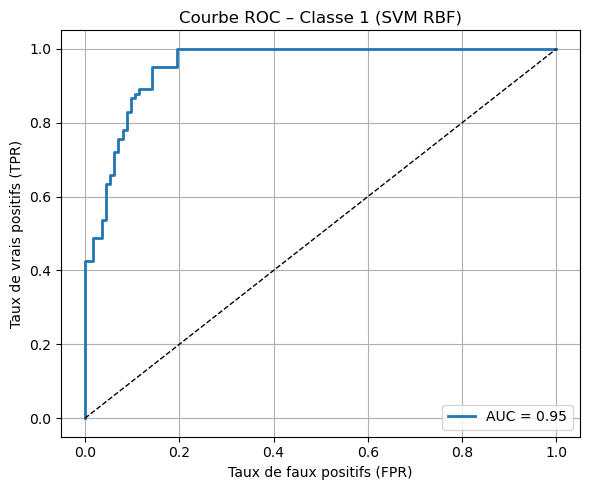

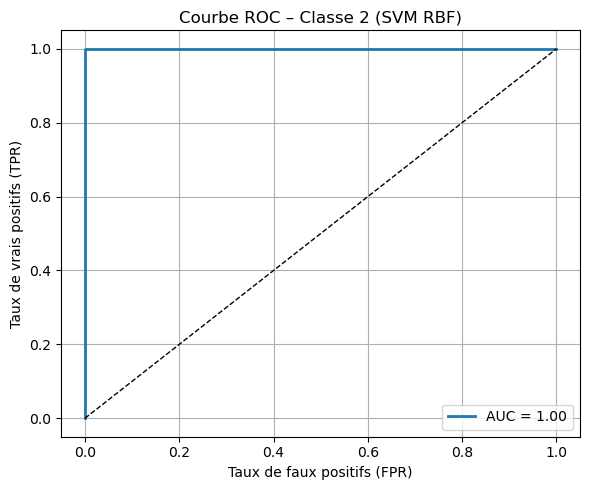

In [384]:
#1. Binariser y_test
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
# 2. Obtenir les probabilités prédites par le SVM
y_score_svm = svmOpt.predict_proba(X_test_scaled)

# 3. Courbe ROC par classe
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_svm[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (SVM RBF)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Avec noyau linéaire:

In [390]:
# 1. Grille d’hyperparamètres : uniquement C ici
param_grid_linear = {
    'C': [0.1,0.3 ,0.5,0.8, 1, 2, 5],
    'kernel': ['linear']
}

# 2. GridSearchCV avec noyau linéaire
svm_linear = GridSearchCV(
    SVC(probability=True),
    param_grid=param_grid_linear,
    cv=5,
    n_jobs=-1
)

# 3. Entraînement
svmOpt_linear = svm_linear.fit(X_train_scaled, y_train)

# 4. Résultats validation croisée + test
print("Meilleur score CV (erreur) :", 1 - svmOpt_linear.best_score_)
print("Meilleur paramètre :", svmOpt_linear.best_params_)


Meilleur score CV (erreur) : 0.12210090984284538
Meilleur paramètre : {'C': 0.5, 'kernel': 'linear'}


In [392]:
# 5. Évaluation sur test
print("Précision test :", svmOpt_linear.score(X_test_scaled, y_test))
print("Erreur test :", 1 - svmOpt_linear.score(X_test_scaled, y_test))

Précision test : 0.882051282051282
Erreur test : 0.11794871794871797


In [394]:
# 6. Matrice de confusion
y_pred_linear = svmOpt_linear.predict(X_test_scaled)
table = pd.crosstab(y_pred_linear, y_test, rownames=['Prédit'], colnames=['Réel'])
print("\nMatrice de confusion (SVM linéaire) :")
print(table)


Matrice de confusion (SVM linéaire) :
Réel     0   1   2
Prédit            
0       61   9   0
1       14  73   0
2        0   0  38


In [438]:
# Extraire le modèle entraîné avec les meilleurs hyperparamètres
svm_final_linear = svmOpt_linear.best_estimator_

# Coefficients du modèle (1 vecteur par classe car One-vs-Rest)
coefs = svm_final_linear.coef_

In [440]:
feature_names = X.columns  # les noms des variables explicatives

# Affichage par classe
for i, coef_vect in enumerate(coefs):
    print(f"\nClasse {i} (vs autres) :")
    sorted_coef = pd.Series(coef_vect, index=feature_names).sort_values(ascending=False)
    print(sorted_coef.head(5))   # top 5 contributeurs positifs
    print(sorted_coef.tail(5))   # top 5 contributeurs négatifs


Classe 0 (vs autres) :
Height (m)        0.295385
Avg_BPM           0.211156
Fat_Percentage    0.055009
Weight (kg)       0.054478
BMI               0.051254
dtype: float64
Gender_Male                       -0.328108
Session_Duration (hours)          -0.592429
Calories_Burned                   -0.687007
Workout_Frequency (days/week)_3   -1.337095
Workout_Frequency (days/week)_4   -2.062424
dtype: float64

Classe 1 (vs autres) :
Fat_Percentage                     0.398211
Gender_Male                        0.166908
Workout_Frequency (days/week)_3    0.039322
Avg_BPM                            0.026920
Workout_Type_Yoga                  0.020591
dtype: float64
Water_Intake (liters)             -0.048101
Calories_Burned                   -0.050552
Session_Duration (hours)          -0.178576
Workout_Frequency (days/week)_5   -0.440109
Workout_Frequency (days/week)_4   -0.710690
dtype: float64

Classe 2 (vs autres) :
Fat_Percentage                     1.425659
Gender_Male                  

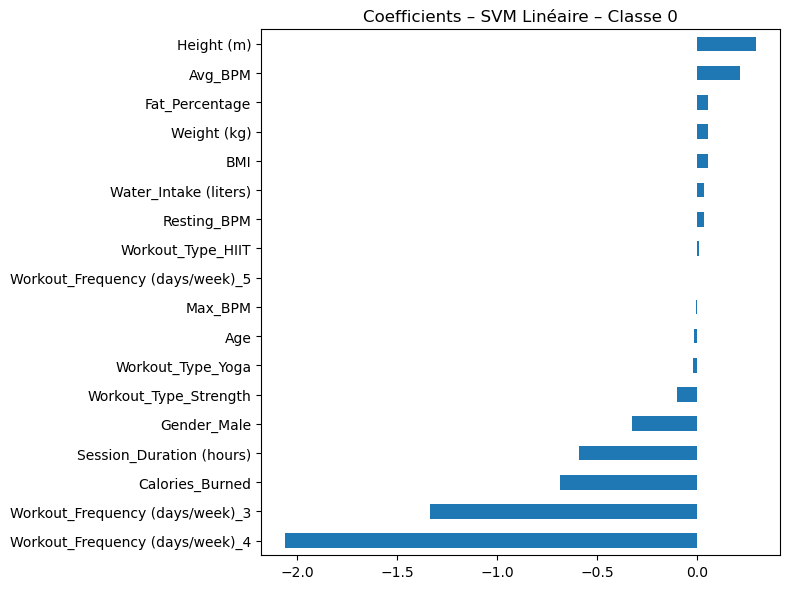

In [442]:
classe = 0 
coef = pd.Series(coefs[classe], index=feature_names)
imp_coef = coef.sort_values()

plt.figure(figsize=(8, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients – SVM Linéaire – Classe {classe}")
plt.tight_layout()
plt.show()

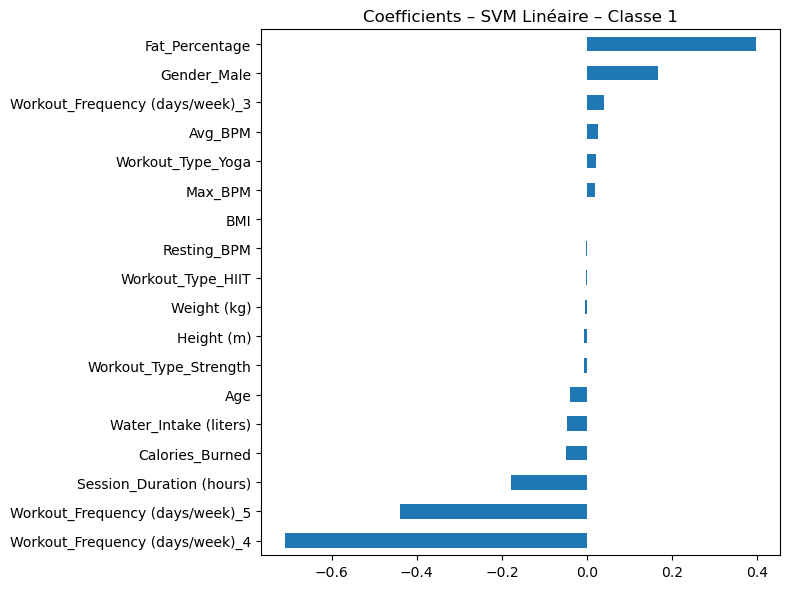

In [444]:
classe = 1 
coef = pd.Series(coefs[classe], index=feature_names)
imp_coef = coef.sort_values()

plt.figure(figsize=(8, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients – SVM Linéaire – Classe {classe}")
plt.tight_layout()
plt.show()

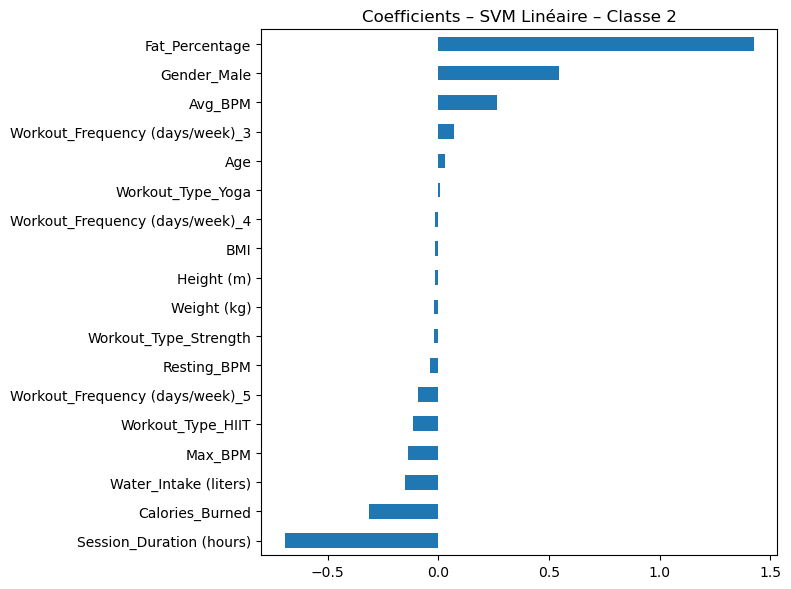

In [446]:
classe = 2
coef = pd.Series(coefs[classe], index=feature_names)
imp_coef = coef.sort_values()

plt.figure(figsize=(8, 6))
imp_coef.plot(kind="barh")
plt.title(f"Coefficients – SVM Linéaire – Classe {classe}")
plt.tight_layout()
plt.show()

Le SVM linéaire met en avant Fat_Percentage, Avg_BPM et le sexe comme variables discriminantes, avec des effets différenciés selon les classes. Contrairement aux modèles comme la forêt aléatoire ou la régression logistique, il accorde moins d’importance à la durée et la fréquence d'entraînement dans la séparation des niveaux d’expérience.

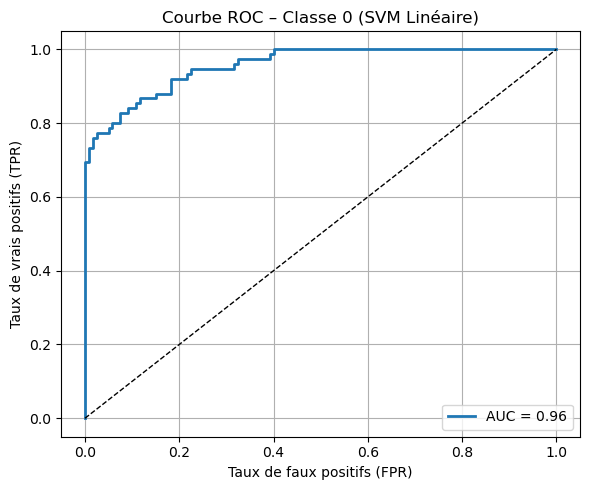

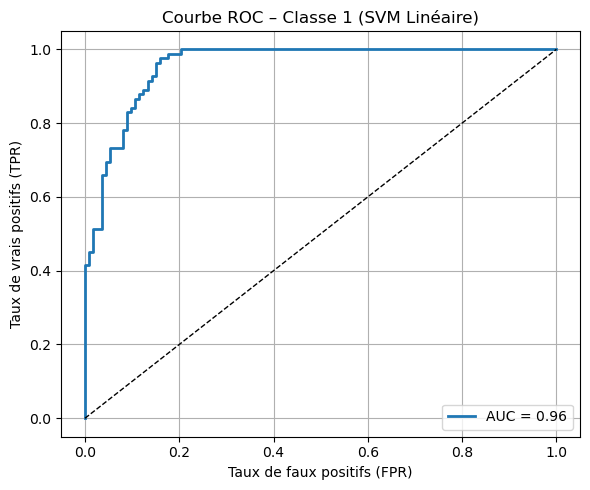

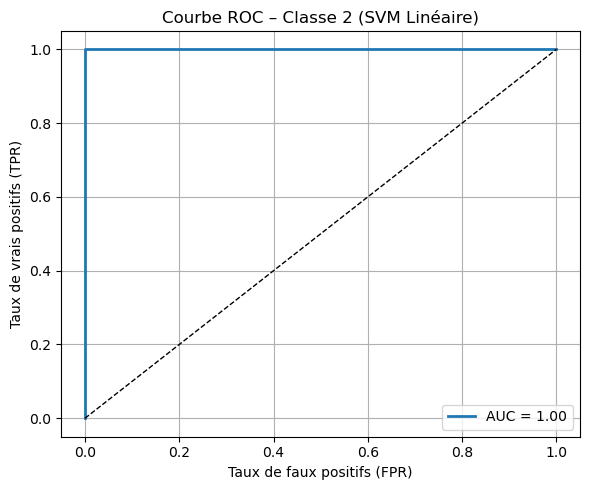

In [396]:
# 2. Obtenir les probabilités prédites par le SVM linéaire
y_score_linear = svmOpt_linear.predict_proba(X_test_scaled)

# 3. Tracer une courbe ROC pour chaque classe
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_linear[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (SVM Linéaire)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

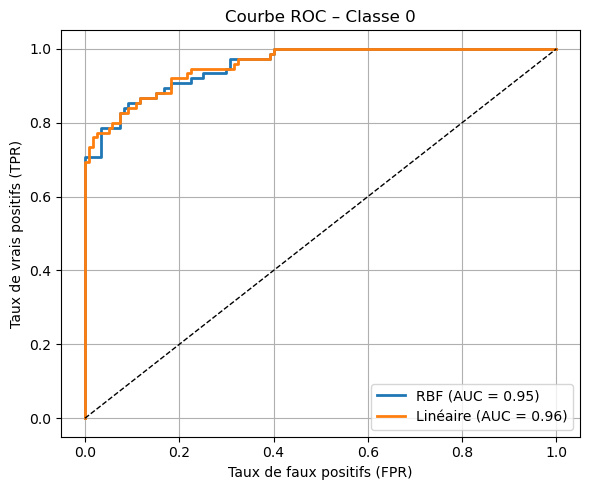

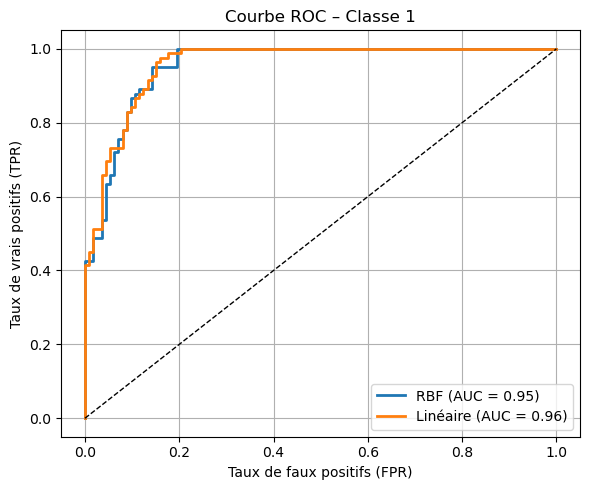

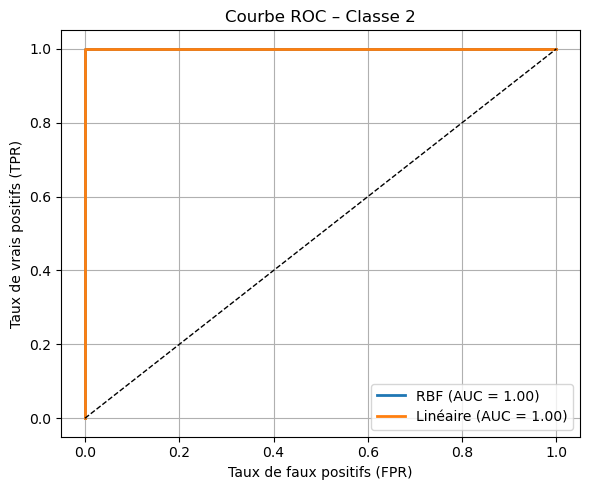

In [398]:
# 2. Probabilités des deux modèles
y_score_rbf = svmOpt.predict_proba(X_test_scaled)           # SVM RBF
y_score_linear = svmOpt_linear.predict_proba(X_test_scaled) # SVM Linéaire

# 3. Tracer une courbe ROC par classe, avec les 2 noyaux
for i in range(y_test_bin.shape[1]):
    # RBF
    fpr_rbf, tpr_rbf, _ = roc_curve(y_test_bin[:, i], y_score_rbf[:, i])
    auc_rbf = auc(fpr_rbf, tpr_rbf)

    # Linéaire
    fpr_lin, tpr_lin, _ = roc_curve(y_test_bin[:, i], y_score_linear[:, i])
    auc_lin = auc(fpr_lin, tpr_lin)

    # Tracé
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_rbf, tpr_rbf, lw=2, label=f"RBF (AUC = {auc_rbf:.2f})")
    plt.plot(fpr_lin, tpr_lin, lw=2, label=f"Linéaire (AUC = {auc_lin:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Le noyau linéaire est un peu plus performant que le noyau gaussien.

## Arbre optimal

In [402]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [404]:
# 1. Définir la grille d'hyperparamètres pour la profondeur
param_grid = [{"max_depth": list(range(2, 10))}]

# 2. GridSearchCV avec arbre de décision
tree = GridSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_grid,
    cv=5,
    n_jobs=-1
)

# 3. Entraînement sur l’échantillon d’apprentissage
treeOpt = tree.fit(X_train_scaled, y_train)

# 4. Affichage du meilleur paramètre et score CV
print("Meilleur score CV (erreur) :", 1 - treeOpt.best_score_)
print("Meilleur paramètre :", treeOpt.best_params_)


Meilleur score CV (erreur) : 0.10411083540115806
Meilleur paramètre : {'max_depth': 4}


In [406]:
# 5. Évaluation sur l’échantillon test
print("Précision test :", treeOpt.score(X_test_scaled, y_test))
print("Erreur test :", 1 - treeOpt.score(X_test_scaled, y_test))


Précision test : 0.9230769230769231
Erreur test : 0.07692307692307687


In [408]:
# 6. Prédictions et matrice de confusion
y_chap = treeOpt.predict(X_test_scaled)
table = pd.crosstab(y_chap, y_test, rownames=['Prédit'], colnames=['Réel'])
print("\nMatrice de confusion :")
print(table)


Matrice de confusion :
Réel     0   1   2
Prédit            
0       60   0   0
1       15  82   0
2        0   0  38


C:\Users\anter\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


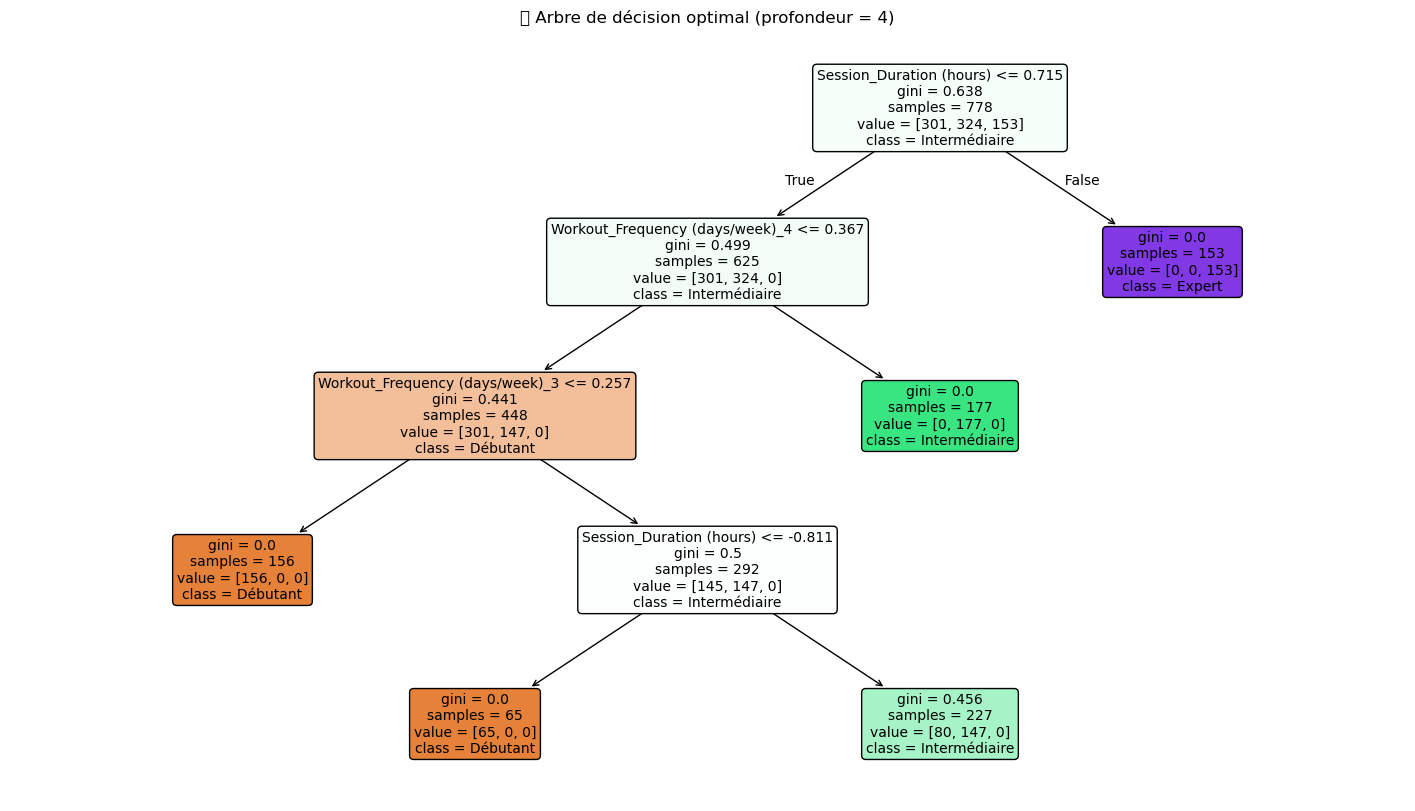

In [413]:
# 7. Visualisation de l’arbre optimal
# On le réentraîne avec le meilleur paramètre trouvé
treeG = DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'], random_state=0)
treeG.fit(X_train_scaled, y_train)

# Noms des variables
feature_names = X.columns

# Tracé
plt.figure(figsize=(18, 10))
plot_tree(treeG, feature_names=feature_names, class_names=['Débutant', 'Intermédiaire', 'Expert'],
          filled=True, rounded=True, fontsize=10)
plt.title("Arbre de décision optimal (profondeur = {})".format(treeOpt.best_params_['max_depth']))
plt.show()

L’arbre de décision identifie deux variables déterminantes : la durée des séances et les fréquences d’entraînement. Il distingue parfaitement les experts (séances longues) et les débutants (fréquence et durée faibles), tandis que les intermédiaires apparaissent dans des cas intermédiaires. Le modèle fournit ainsi des règles simples et interprétables pour prédire le niveau d’expérience.

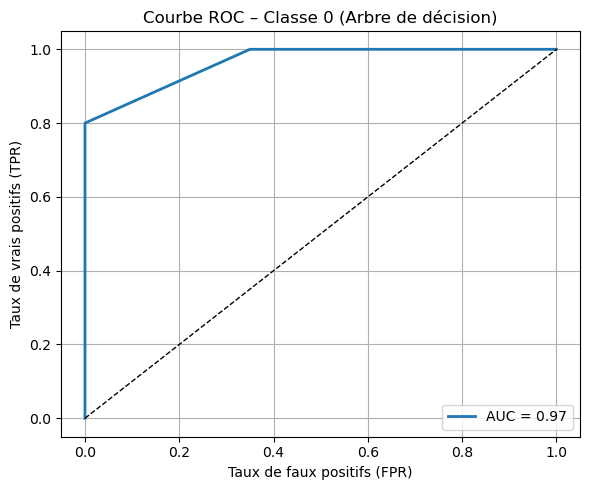

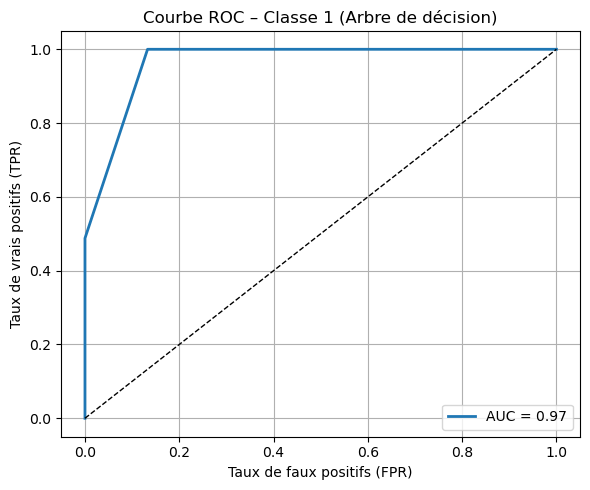

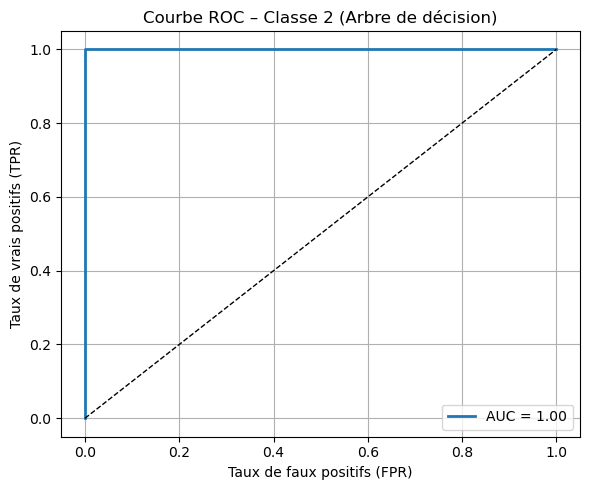

In [418]:
# 1. Binariser y_test (si pas déjà fait)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# 2. Probabilités prédites par l’arbre optimal
y_score_tree = treeOpt.predict_proba(X_test_scaled)

# 3. Tracer les courbes ROC pour chaque classe
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_tree[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (Arbre de décision)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Random Forest 

In [422]:
from sklearn.ensemble import RandomForestClassifier

In [424]:
# 1. Forêt aléatoire initiale avec OOB (hors sac)
forest = RandomForestClassifier(
    n_estimators=500,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_leaf_nodes=None,
    bootstrap=True,
    oob_score=True,
    random_state=0
)

rfFit = forest.fit(X_train_scaled, y_train)

print("Erreur OOB (out-of-bag) :", 1 - rfFit.oob_score_)
print("Précision test :", rfFit.score(X_test_scaled, y_test))
print("Erreur test :", 1 - rfFit.score(X_test_scaled, y_test))

Erreur OOB (out-of-bag) : 0.12210796915167099
Précision test : 0.882051282051282
Erreur test : 0.11794871794871797


-> Erreur OOB correspond à l'erreur de prédiction sur les données non utilisées lors de la construction des arbres.

In [427]:
# 2. Optimisation de max_features
param_grid = [{"max_features": list(range(2, 10))}]
rf = GridSearchCV(
    RandomForestClassifier(n_estimators=100, random_state=0),
    param_grid,
    cv=5,
    n_jobs=-1
)

rfOpt = rf.fit(X_train_scaled, y_train)

print("Meilleur paramètre :", rfOpt.best_params_)
print("Erreur CV :", 1 - rfOpt.best_score_)
print("Erreur test (modèle optimisé) :", 1 - rfOpt.score(X_test_scaled, y_test))


Meilleur paramètre : {'max_features': 7}
Erreur CV : 0.12209263854425134
Erreur test (modèle optimisé) : 0.10769230769230764


In [429]:
# 3. Matrice de confusion
y_chap = rfFit.predict(X_test_scaled)
table = pd.crosstab(y_chap, y_test, rownames=["Prédit"], colnames=["Réel"])
print("\n Matrice de confusion :")
print(table)


 Matrice de confusion :
Réel     0   1   2
Prédit            
0       63  11   0
1       12  71   0
2        0   0  38


In [431]:
# 4. Importance des variables avec la meilleure forêt
rf_final = RandomForestClassifier(
    n_estimators=100,
    max_features=rfOpt.best_params_['max_features'],
    random_state=0
)
rfFit_final = rf_final.fit(X_train_scaled, y_train)

importances = rfFit_final.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

print("\n Importances décroissantes des variables :")
for f in range(X_train_scaled.shape[1]):
    print(f"{feature_names[indices[f]]:<30s} {importances[indices[f]]:.4f}")



 Importances décroissantes des variables :
Session_Duration (hours)       0.2821
Workout_Frequency (days/week)_4 0.1808
Fat_Percentage                 0.1640
Calories_Burned                0.0887
Workout_Frequency (days/week)_3 0.0822
Weight (kg)                    0.0253
Water_Intake (liters)          0.0236
BMI                            0.0226
Max_BPM                        0.0221
Workout_Frequency (days/week)_5 0.0217
Height (m)                     0.0216
Avg_BPM                        0.0204
Age                            0.0189
Resting_BPM                    0.0169
Workout_Type_HIIT              0.0030
Workout_Type_Strength          0.0025
Workout_Type_Yoga              0.0023
Gender_Male                    0.0015


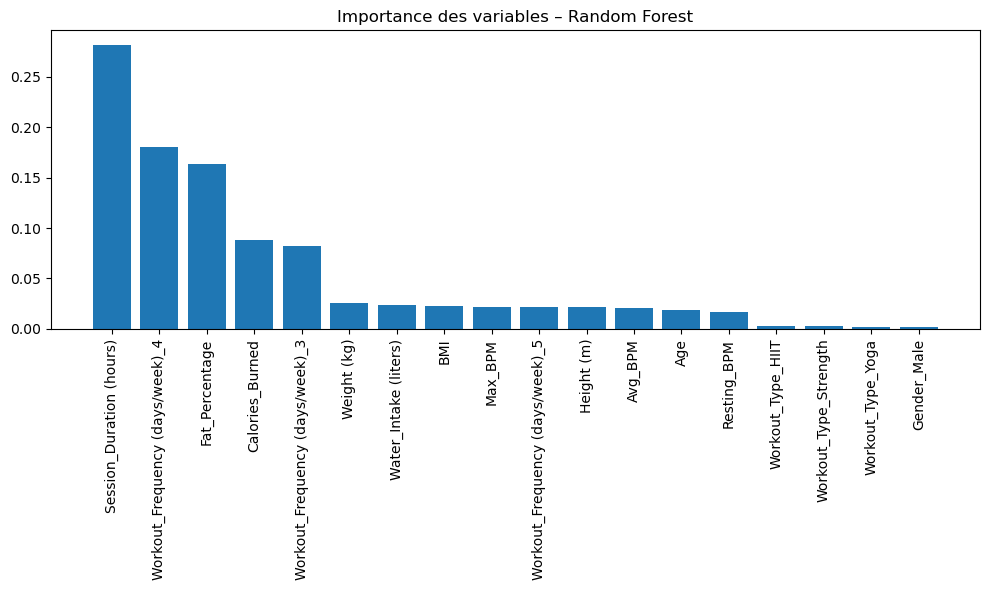

In [433]:
# 5. Graphe des importances
plt.figure(figsize=(10, 6))
plt.title("Importance des variables – Random Forest")
plt.bar(range(X_train_scaled.shape[1]), importances[indices])
plt.xticks(range(X_train_scaled.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

Le modèle Random Forest met en avant la durée des séances, la fréquence d'entraînement (en particulier 4 fois/semaine), ainsi que le taux de masse grasse comme principaux déterminants du niveau d'expérience. À l’inverse, le type d'entraînement suivi et le sexe ont peu d’influence sur la classification selon la forêt aléatoire.

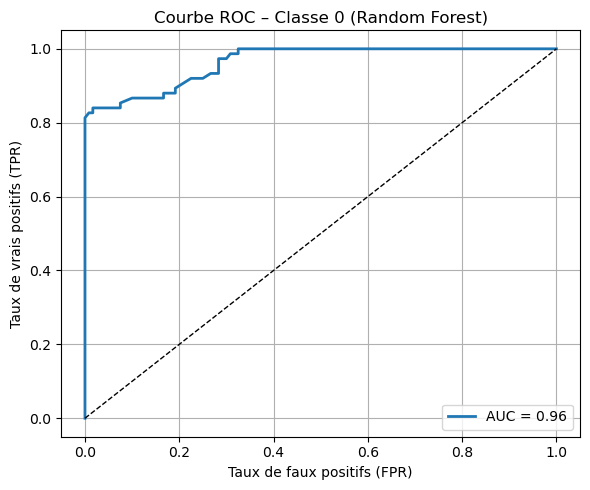

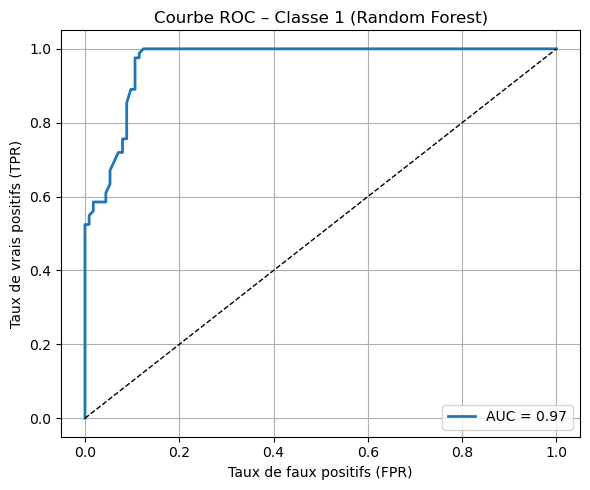

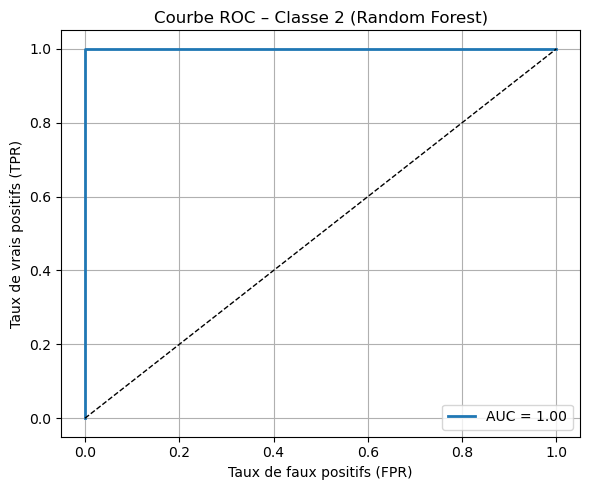

In [436]:
# 1. Binariser la cible (si ce n’est pas déjà fait)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# 2. Prédire les probabilités sur le test
y_score_rf = rfFit_final.predict_proba(X_test_scaled)

# 3. Tracer une courbe ROC par classe
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (Random Forest)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Boosting

In [450]:
from sklearn.ensemble import GradientBoostingClassifier
import time

In [454]:
# 1. Début chronométrage
tps0 = time.perf_counter()

# 2. Grille de paramètres (nombre d’estimateurs à tester)
param_grid = [{"n_estimators": [200, 250, 300, 350, 400]}]

# 3. GridSearchCV avec validation croisée
gbm = GridSearchCV(
    GradientBoostingClassifier(random_state=0),
    param_grid,
    cv=5,  # 5-fold CV
    n_jobs=-1
)

# 4. Entraînement sur données standardisées
gbmOpt = gbm.fit(X_train_scaled, y_train)

# 5. Fin du chronométrage
tps1 = time.perf_counter() - tps0

# 6. Résultats validation croisée
print("Temps boosting       :", round(tps1, 2), "secondes")
print("Meilleur paramètre   :", gbmOpt.best_params_)
print("Erreur validation CV :", round(1 - gbmOpt.best_score_, 4))


Temps boosting       : 34.74 secondes
Meilleur paramètre   : {'n_estimators': 300}
Erreur validation CV : 0.1183


In [456]:
# 7. Évaluation sur échantillon test
print("Précision test       :", gbmOpt.score(X_test_scaled, y_test))
print("Erreur test          :", 1 - gbmOpt.score(X_test_scaled, y_test))

Précision test       : 0.8871794871794871
Erreur test          : 0.11282051282051286


In [458]:
# 8. Matrice de confusion
y_chap = gbmOpt.predict(X_test_scaled)
table = pd.crosstab(y_chap, y_test, rownames=["Prédit"], colnames=["Réel"])
print("\nMatrice de confusion (Gradient Boosting) :")
print(table)


Matrice de confusion (Gradient Boosting) :
Réel     0   1   2
Prédit            
0       63  10   0
1       12  72   0
2        0   0  38


Importances décroissantes (globales) :
Session_Duration (hours)            0.5757
Workout_Frequency (days/week)_4     0.1684
Fat_Percentage                      0.0959
Workout_Frequency (days/week)_3     0.0698
BMI                                 0.0164
Calories_Burned                     0.0156
Weight (kg)                         0.0114
Water_Intake (liters)               0.0108
Height (m)                          0.0092
Age                                 0.0088
Avg_BPM                             0.0074
Max_BPM                             0.0053
Resting_BPM                         0.0040
Workout_Type_Yoga                   0.0004
Workout_Type_Strength               0.0004
Workout_Type_HIIT                   0.0003
Gender_Male                         0.0002
Workout_Frequency (days/week)_5     0.0001


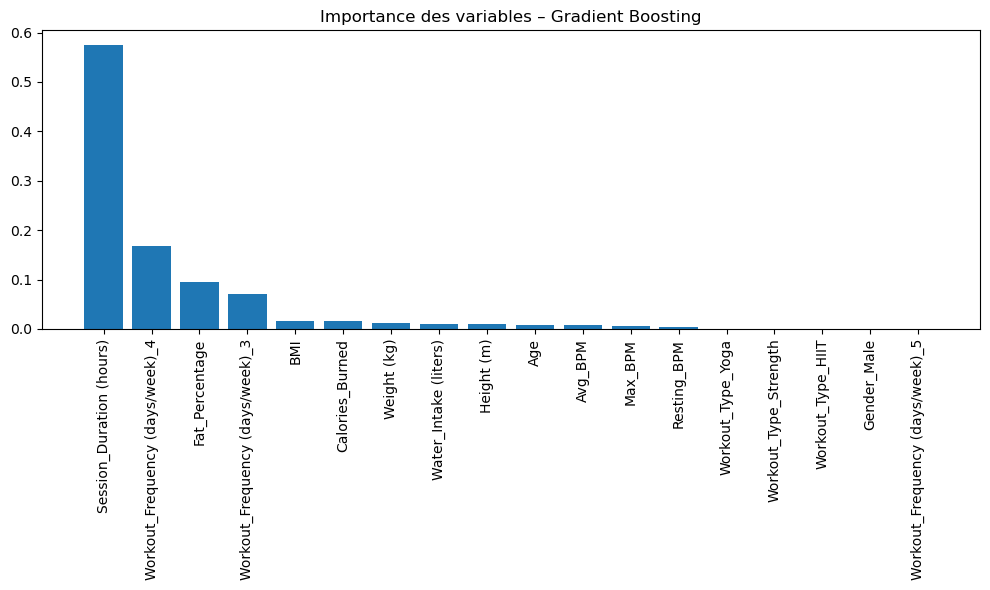

In [462]:
# Récupérer le meilleur modèle
gbm_final = gbmOpt.best_estimator_

# Importances globales
importances = gbm_final.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Affichage texte
print("Importances décroissantes (globales) :")
for i in range(len(feature_names)):
    print(f"{feature_names[indices[i]]:<35s} {importances[indices[i]]:.4f}")

# Affichage graphique
plt.figure(figsize=(10, 6))
plt.title("Importance des variables – Gradient Boosting")
plt.bar(range(len(feature_names)), importances[indices])
plt.xticks(range(len(feature_names)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

Le modèle Gradient Boosting identifie très fortement la durée des séances (Session_Duration) comme la variable la plus déterminante, représentant à elle seule plus de 57% de l’importance totale. Elle est suivie par la fréquence d’entraînement à 4 jours/semaine et le taux de masse grasse. Les autres variables ont une influence marginale, notamment les types d'entraînement et le sexe, qui jouent un rôle quasi nul dans les décisions du modèle. Cela confirme la prédominance des habitudes sportives et des indicateurs corporels dans la prédiction du niveau d’expérience.

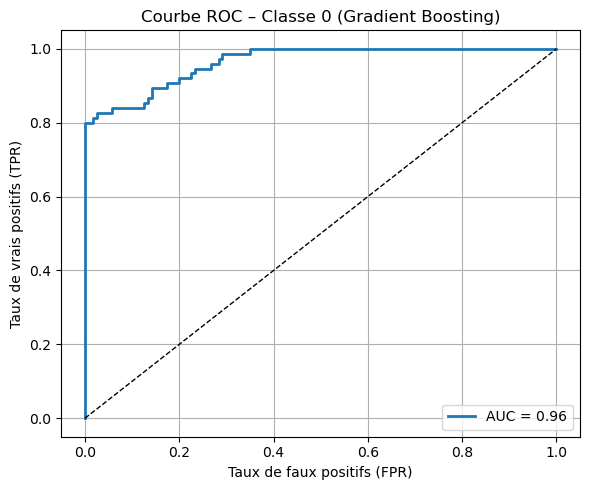

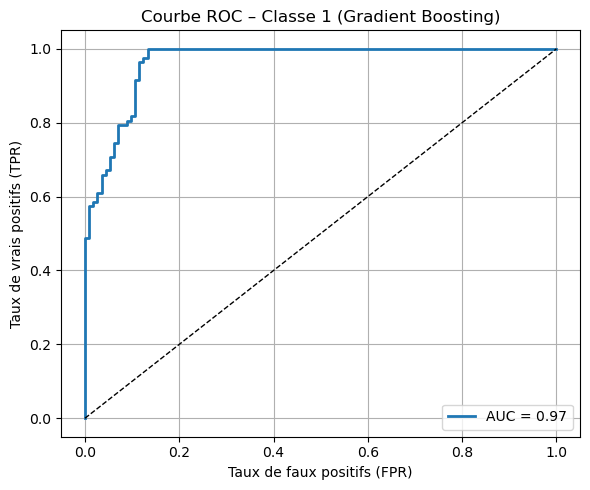

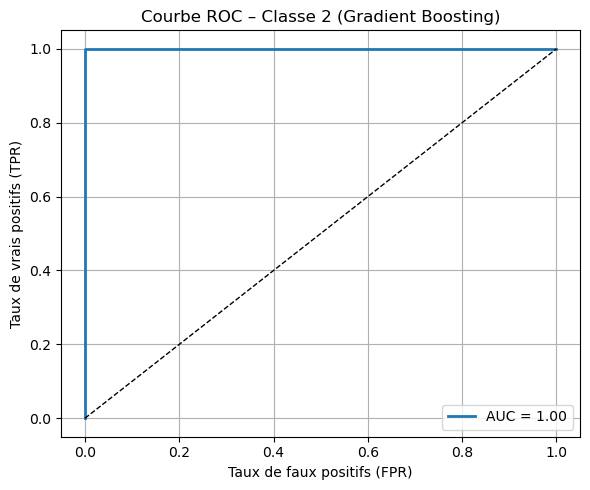

In [460]:
# 1. Binarisation de la variable cible (si pas déjà fait)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# 2. Obtenir les probabilités prédites par le modèle Boosting
y_score_gbm = gbmOpt.predict_proba(X_test_scaled)

# 3. Tracer une courbe ROC par classe
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_gbm[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (Gradient Boosting)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Réseau de neurones 

In [466]:
from sklearn.neural_network import MLPClassifier

In [470]:
# 1. Définir une grille d'architecture (1 couche cachée de taille 5 à 8)
param_grid = [{
    "hidden_layer_sizes": [(5,), (6,), (7,), (8,), (9,), (10,)]
}]

# 2. GridSearchCV avec validation croisée
nnet = GridSearchCV(
    MLPClassifier(max_iter=500, random_state=0),
    param_grid,
    cv=5,
    n_jobs=-1
)

# 3. Entraînement sur les données standardisées
nnetOpt = nnet.fit(X_train_scaled, y_train)

# 4. Affichage du meilleur score et paramètre
print("Meilleur paramètre :", nnetOpt.best_params_)
print("Erreur validation CV :", 1 - nnetOpt.best_score_)


Meilleur paramètre : {'hidden_layer_sizes': (8,)}
Erreur validation CV : 0.131100082712986


C:\Users\anter\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [472]:
# 5. Évaluation sur l’échantillon test
print("Précision test :", nnetOpt.score(X_test_scaled, y_test))
print("Erreur test :", 1 - nnetOpt.score(X_test_scaled, y_test))

Précision test : 0.8564102564102564
Erreur test : 0.14358974358974363


In [474]:
# 6. Prédiction et matrice de confusion
y_chap = nnetOpt.predict(X_test_scaled)
table = pd.crosstab(y_chap, y_test, rownames=["Prédit"], colnames=["Réel"])
print("\n Matrice de confusion (Réseau de neurones) :")
print(table)


 Matrice de confusion (Réseau de neurones) :
Réel     0   1   2
Prédit            
0       63  16   0
1       12  66   0
2        0   0  38


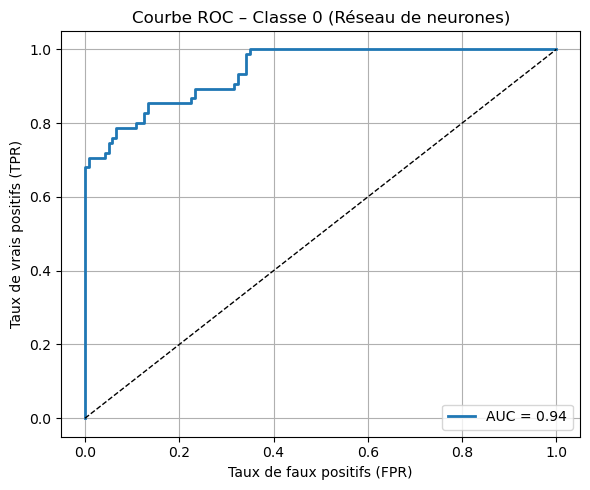

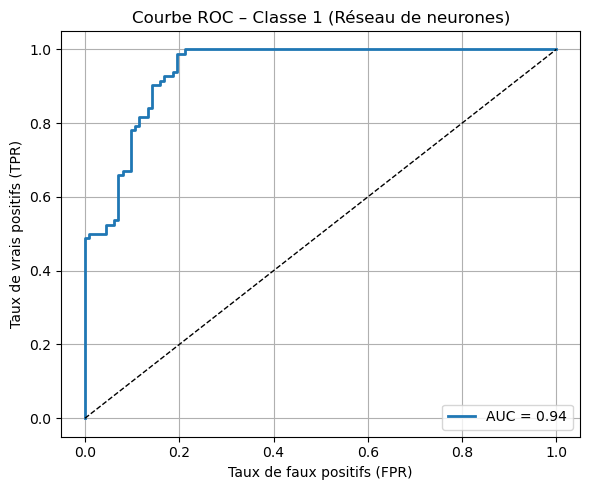

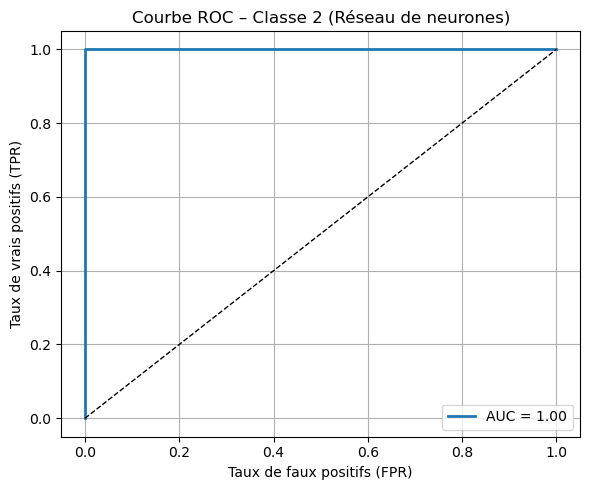

In [476]:
# 1. Binarisation de la cible (si ce n’est pas déjà fait)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# 2. Probabilités prédites par le réseau de neurones
y_score_nnet = nnetOpt.predict_proba(X_test_scaled)

# 3. Courbe ROC pour chaque classe
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_nnet[:, i])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbe ROC – Classe {i} (Réseau de neurones)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Comparaison de toutes les méthodes

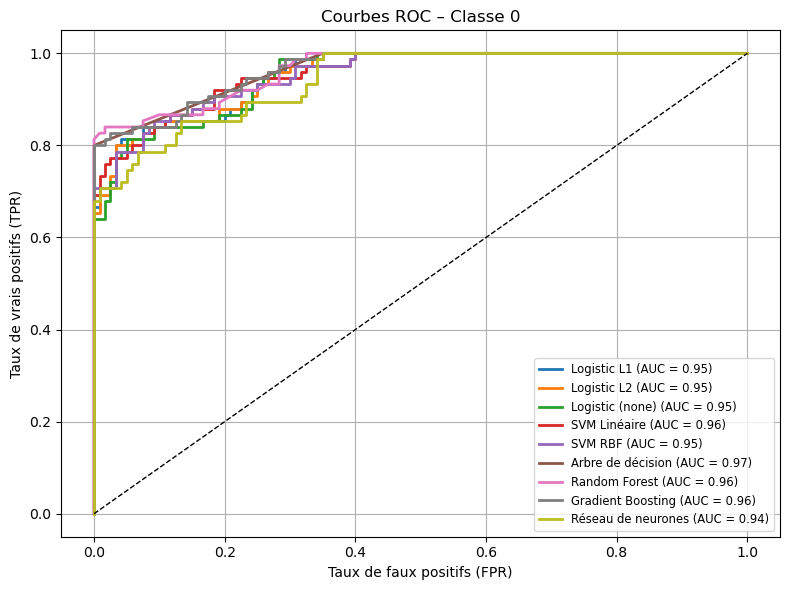

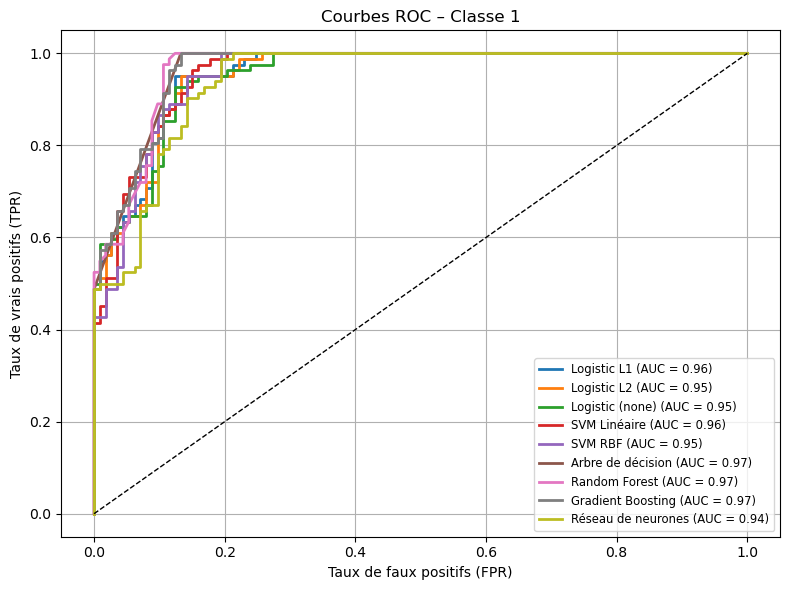

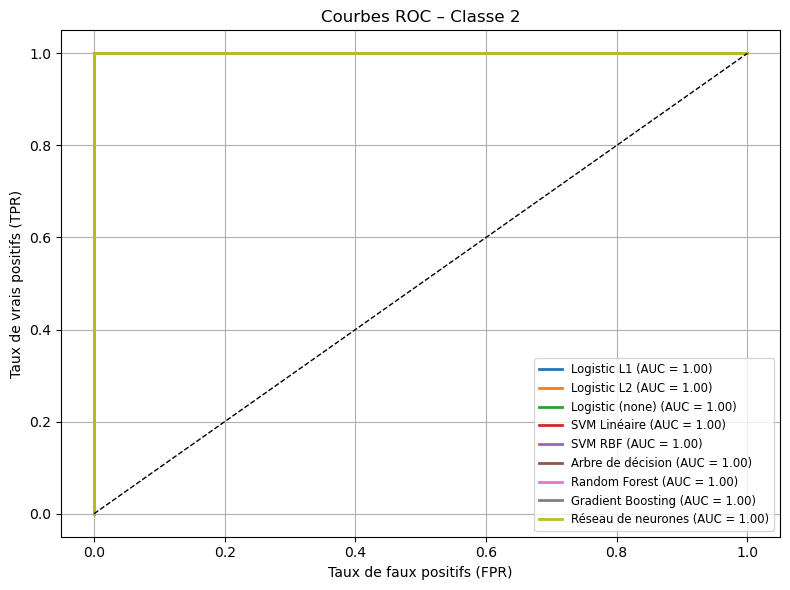

In [479]:
# Dictionnaire de scores à comparer
roc_scores = {
    "Logistic L1": y_score_L1,
    "Logistic L2": y_score_L2,
    "Logistic (none)": y_score_none,
    "SVM Linéaire": y_score_linear,
    "SVM RBF": y_score_rbf,
    "Arbre de décision": y_score_tree,
    "Random Forest": y_score_rf,
    "Gradient Boosting": y_score_gbm,
    "Réseau de neurones": y_score_nnet
}

# Pour chaque classe, une figure contenant toutes les courbes ROC
for i in range(y_test_bin.shape[1]):
    plt.figure(figsize=(8, 6))
    
    for name, scores in roc_scores.items():
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.title(f"Courbes ROC – Classe {i}")
    plt.legend(loc="lower right", fontsize='small')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Nous pouvons voir que pour la classe expert, toutes les méthodes ont un AUC à 1, ce qui veut dire que toutes les méthodes arrivent à détecter les experts, les sportifs de haut niveau. Pour la classe intermédiaire, on peut voir que les méthodes avec les AUC les plus élevés AUC sont l'arbre de décision, le Random Forest et le Gradient Boosting. Concernant la classe débutant, c'est l'arbre de décision qui a l'AUC le plus élevé.\
De plus, l'Arbre de décision peut être interprété assez facilement. Dans notre cas on peut voir que les variables avec le plus d'influences sont la fréquence et la durée de l'activité sportive.